#AG2 - Actividad Guiada 2
Nombre: Francisco Ulloa <br>
Link:   https://colab.research.google.com/drive/xxxxxxxxxxxxxxxxxxxxxxxxx <br>
Github: https://github.com/xxxxx/AlgoritmosOptimizacion
<br>




In [34]:
import math

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

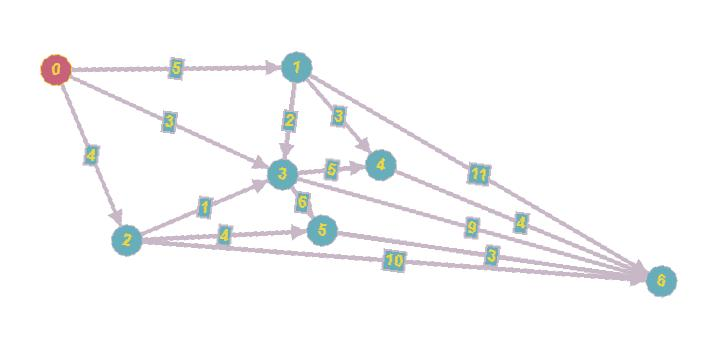

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [35]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [36]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [37]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [38]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)


La ruta es:


'0,2,5'

##Problema de Asignacion de tarea

In [39]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [40]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR



valor((3,2,  ),COSTES)

34

In [41]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [42]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [43]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [44]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


##Descenso del gradiente

In [45]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [46]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

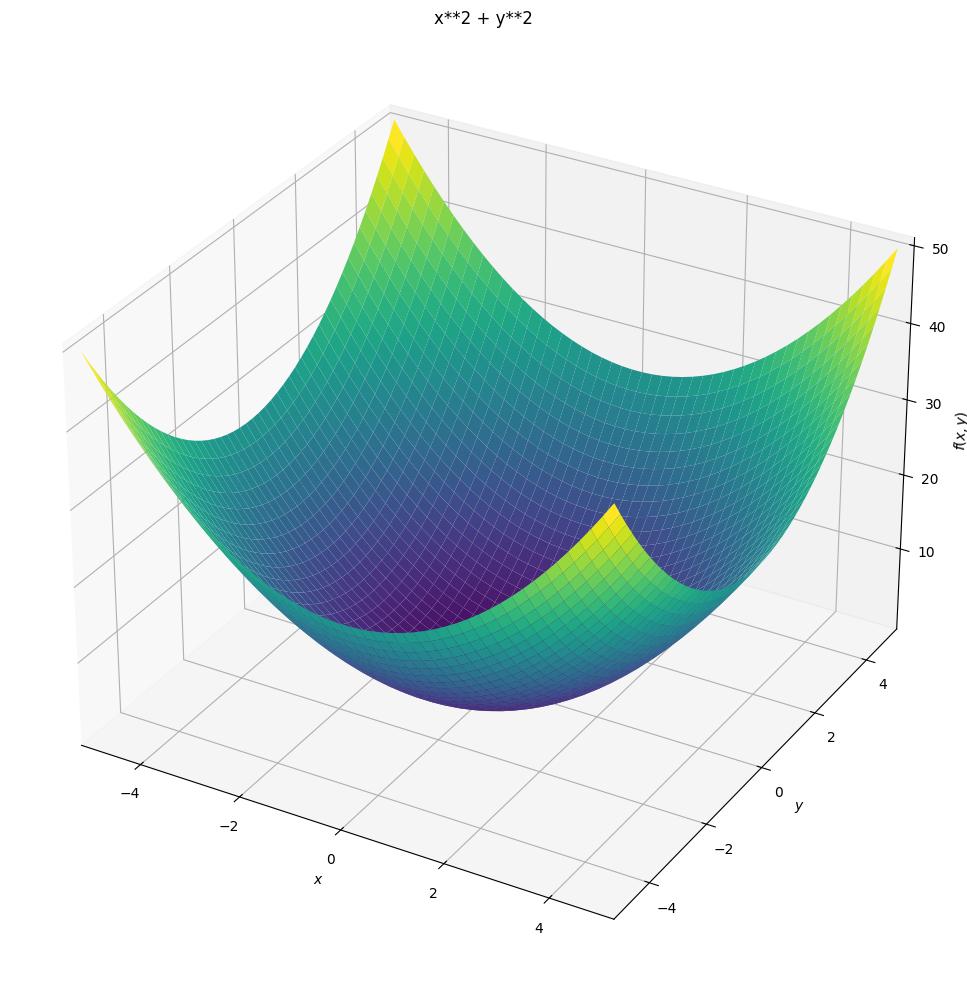

In [47]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

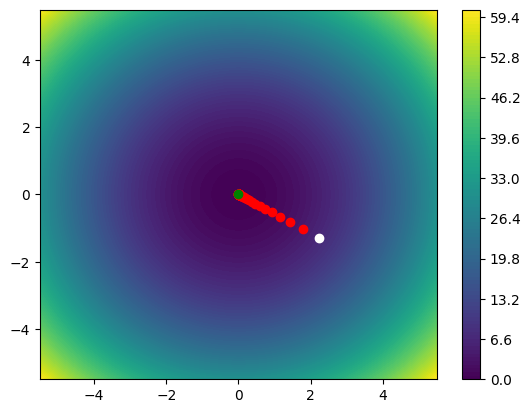

Solucion: [3.204742546222279e-05, -1.8428782548489686e-05] 1.3666575049762439e-09


In [48]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$





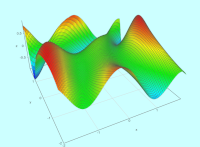

In [49]:
from IPython.display import display, Image
from io import BytesIO
import base64

imagen_base64 ="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAACTCAYAAADLEVaqAAAXr3pUWHRSYXcgcHJvZmlsZSB0eXBlIGV4aWYAAHjarZpplhw3doX/YxVeAqaHYTkYz+kdePn+LipJkaIoddtmqSpTkZERwBvuAIQ7//2v6/6Lf1ZDdNlqK70Uz7/cc4+DN81//evvb/D5/X3/1rfPws/HXU+fDyKH9P7z/3V8zh8ctz++8P068+fjrn0+ie1zofD9wu9f0p31fv84SI7Hr+MhfxvR+XpTeqs/DnV+LrQ+J76hfH7zH9N7//T/7qcDlSht40YpxpNC8u9v+xpB0m9Mg9fA38A5eqcjMTX3Pvg2VwLy0/S+vXr/Y4B+CvK3d+7P0Z/rr4Mfx+eM9KdYlk+MePOXHwT70/H0/f7xxxun7yOKP38QerBfpvP5vXe3e8/X7EYuRLR8KuoFO3y7DCdOQp7e1wo/lV/jfX0/nZ/mh1+kfPvlJz+LG0eycl3IYYcRbjjvdYXFEHM8sfIa44rpHWupxh7Xy1jWT7ixpp52auRsxeNS4nD8Ppbw7tvf/VZo3HkHTo2Bi4WX/t/8uL/78D/5cfcq3yEomKQ+fCU4qq4ZhjKnv5xFQsL95M1egL/9fNLvfygsSpUM2gtzY4LDz69LTAt/1FZ6eU6cZ7x+tVBwdX8uQIi4tzGYkMiALyFZKMHXGGsIxLGRoMHIY8pxkoFgFjeDjDmlEl2NLerefKeGd260WKIOg00kwlJJldz0NEhWzkb91NyooWHJspkVq9acdRsllVyslFKLQG7UVHO1WmqtrfY6Wmq5WSutttZ6Gz32BAZaL7321nsfI7rBjQbXGpw/ODLjTDNPm2XW2WafY1E+Ky9bZdXVVl9jx502MLHLrrvtvscJ7oAUJx875dTTTj/jUms33Xztlltvu/2O71n7ZPWXn/8ga+GTtfgypfPq96xx1NX67RJBcGLKGRmLOZDxqgwIwZQz30LOUZlTznyPNIVFBmnKjdtBGSOF+YRoN3zP3R+Z+7fy5qz9W3mL/5Q5p9T9f2TOkbpf8/YXWdviufUy9tWFiqlPdN+tfsTmRpzDX7Cn8X/D/69f3f/1AnodkJezcsz8JdSHcfJJL3916jgj1BtK32XstOY6qZmds+qOZC8PF/vqZzWSPjvtbrNHW3uvUADpXk603LavtaQ2TlKJ17Ym+LDT2Tm3lsacLS13NymiVMjO4m6n1jwbBb1SOLWJztrMy9uCMGov944wbm+LSpljth32nP3m7bjYGM1iu4BKsrrnqHfByXuHuqz7M2CA2DeIHsNpdYZxug8UARk2bhzgqF7dncvCLCWnVjzjIhiXyWRYgzaJsxo9HNJdYxamlAaRqWcx9nNLZXynFqad3TBf18218OHaIROmm3PtUW9zWyChJyRLABkLwF6K5dALoH5NB8DVDow6yhPlZmOeSfml6mEyLs2gocHU1p27mg3LdN+OZx94cHuDOundi+oxMklTuh3TrqRqWKica0vxXlZPBBhXovcAlBlt534PeVv8rXtMphDJC03UYyWSLtDvMfdx/dn13EPzVMv93GjpktB6OE7cZyW0swD7fjQabneayXpL1sZYPbt5VDv73GbpRL/qoIpoQ66ZGjOhgO5EvhHtffa6lSiXeQA1VGw0A5ZKJEOwyFiJlNJ6l6qewA+J3zFTDGcHyKWYZ/a7Xqq6trzynUYECOisaayJXLMyyFqk0inA0OdVokAhdGWzlzXvf/sK2LXu91oAZK/JlbZnsdZXSafvm2x00HWuHg4wc0tYl5Z5lV+6t5EPskjJPdfTMVkIRpTRkLnzBRqv51gGSHUW+qTuUuK2KN11bC0Kgn68gzlI5k+GX3rO0x+LeZ2QpiubC1PP9Mva+VBWNMJAkM0ltWOgHIBJqXLhBATvWOZ9qpY7h0ytjDo5030V80FMlRSB7xJaH7kKJMLaNXLiZaiWegdoCc9dbWQYf6wy9xiwSb0zZpc3Q0y93hzrTsDqEaCXkzxVGna3Ooo/nm7LA9hVhSzUQa+baCYGiqikwYoLBWRvFIbK+3Z0R4ZREIaNAlqZm7ZKd+VL1QL6oOAZI23uQGhaL2mbtW3ZgSp+MHeaRGoBHLKbaqAquLLx3gAAJOOhNPtN6baNnSKMEUCDMCQ5JxLbpdm9wGBap6MEFIwH5Kr1EjsPqtLbAZ1QuzCN4Rif1bzhHPitURpzkxW4n5q122gdo2lHm4MgHeaRRydjhGXaqHZsDmZVU+mzcr8oVl/lhLtpstNcZTB0yy1I4o48CYhdir9R3HfFCXx5QlGJbDyQnMD2FPRwEZczGvj1KrkO+7PLskl1jbriBn/gYkQ2/cJYyEW6aAwi6xctgMukxUqlVQdjXUry8nlXtwkumAh6VQ9ew+YTJb4nzLGjyq5ptkyBDtgz0bOUbR4FmK7xBsIJjaVg7nSAZNZNJG2GRFV5KnCB54AG/cb0L4GYlOGWwucHoqLjJ4lGyfpB5kAzN440Qb+WQU+yjXbhGwA4OuSA/JFSR1A0KnpToKAt+DSY3mHOABFaSHS1HCkbm/EX6NEmqHdx3KR3EKawKsTiR4fDEjAnaoP0ssCS/4E87pWJtT2yE2Xsc4y+j4BJFwyDjGTphELVXsAecCtlUfbxrg6dgDfvEsxjiF37vdOle8DyAYyAZ80bwu0GqI9LgiBk1mAKMJs+3/kCNFXoapXRLbA1+nYO9GkO5Gyx2rxdY6x5VaV+L2j/+Hr9153zOFuMdWgr/YdiqNQrJdZGiOQpkP5es5QSQsnQoe8dPPjLa1mtRTi4S7qEpv9naHmGGVef5ox0LBphouPgz1r7SIyeeiNKoOGG2EQnWdiRkGmds0OXmjMIJzOVss7pDp4DR6UPKPGwiO5lrJ3pcnOIrlgHzJAsoHr3CGN/GsmHf1VUBSr2AEKfDvBIc1/Cmi+0VKlE0HACQqDW5YY4JmQu2lu83dAQ4QK0syB77rpCsw3PRUcuoWWwEmWVasejniSBTYEC4EADYAbfYixO8dy6MTvKljyQAKYC51IiyTu0G0gNEpHMdfntqHyAD4IYU2Sd9ti3w8XSz1yZ+RObTswRQgf4rgkdMRwB5cqMQ+qGQTb4Ky3cHUUwrSzuaUhIz8WQmV2VcB8mQoo1ZaCLYkU1OoKWQK1MmyFaSJ3AO1FH8QsiewcAwLnDrQc4DkqQM+qQpFGHECC4hx2H+xFzN3DzAXkWkbAYA1kC57SaEBNdAI3lkFwkWFwB4keeTo9UoXU70LmctIbRW3EBJ3mIoTEuND5UjCaqccFTorswM3S79N2mK8sf5ZYSkEP7XIfJITxcYysufJM4qyeB7yVBALHyilBAjFz5D7wyehjglJuj1W+lX1Z3zRcgareRiBkKAbYLtDNaPtN9Y3o5HEJHYdPA6IFhVKc/DBo0WnNs+BjaBtg6ygh/AnBGsT2NviCoapcCQt6Al5kmK3XQLRtywRky0oukojcpYDR3E4wMwg5CEFtcLs2xMAo1h0GLMMyHO0s0Bl+MjDGL+SECxi3qavBGLQI2H6g6PADcFUDUJSWOMLlUK36y2k7gCa2FVCsyiUg0qb07BTKAPiaG9q/FDU5ByBtAL/vFvdDGvIzuGTKXgM7GpUK0LkLpSiqHpyXppbQW0A+5LHORvCPFe4yUPkHEE94jpwI7d/wA0pcuR6dSsvCcdPdAU04I5qvAYssZQnfkgHr26RTkMP4QBUKvXtGwDiEIRkjoYGiXQaEiYAR1NuwCjnF9CQG8gJP/DQhf+h+LffAFci5b2uRCQlvwTIdT+Tt8FOr61f117ybRzjj6KdONHmE6EDJCkj+4AuAjQ0uKEN1M76uTEJ+BbyECqKdH2rYc7V6Cvoje2SD6BuigdRqalkALSQ10PAnxyIAZuCyI2rdlI2KQbkXhMni6HzgccmSJjsJLXsyQRwMc4Jcp5SGpjgZpJAM/yreAI2p0VNCHqjPhGAj5pFMOlR7MAoiEpNs0AuCwV9nEeyL7KEUyNLlIBenJOjAMBqC2CxaNfsYcy91lVGGaNENcFKbHOnEjKhoOAPXvgzpwcoYiqWq0i7wirMytI+CydCExs/Rz2hBkJIB0D5YjgQL0OH5myHtYyYhqalBKGXAQkMMBGQScyOICQsKq4Gkhj61Jji4YGADMUkmKQG1GerFKuCsEfVTMaN5DVCnuHrhFxr47fzoxwMBqVSa/4oXBdwTErPbaOWChUUnLw9lHXT3VwaVjoWgBpuYl+R1DSbQsCNUKNUJ8AdV8oVnopa3hhZgl9IcdDeifW819K/eknzrg3caM3UXRAuIKLco4lqXW5YX3pmZQ15eTEUJoBuT1lacCRjfq9gaNnhLECS/euyw5VDOkEAnlqzcUN5FLXd4AMpXkW0h5zkaeYizP1arRQ4o74P6HWQ6XZgA4XvS+A2gfev8RNnHWEdEUeI2vQg0WTBW6LWm5gILaZ4KiJ2dExE+iaRyPN4JkmRUq0CqyeVOimIeKWOECSM59a7628W8S4lQfI76ul025QLKMnP6xjja8Wl1hUNm0/K41Aqa2l+AfGdj+0p46NTeFPJkTl3g7KUvr3YGoQOHcD8s/zEOJ1DC6SKgdPcnHfO06Pd2CVogOEGSiCD4R4aHJQUzsppyzbTmxvbciZehoKpn+gGBiZ3bI6QR0AbMQ/kSNAGVxS5kf3DhtGgM3xQe05JPwY0F4o6FQgQ6ExFUEJ1mRZs4HcIO2R3egOCRPfVP6QUsSU0owa5cBPaKCoQCMAa8BloHqhEtL0Itk+0t4KuoXleMyxI0mxKCirOJ808B5oqVQulrh2iVrWQMpSF2Xe5aBfUXLQY3aVY8fiXOXE/cDsiI1jXPEXUgwgg6go9bW6OeC3eggzTEvSQ7kFErtFAxFG6hjL8XhTkRbyuMQCRLWaDXaWnKfUQ6sjjoaDI47r/GaDTTAbDRL0AedQNoKvpWCpANkBcHfDndBWtJQA3IB9IO2R7aUBb/Qoz8Fg7mIB3JlccWOCqNi5saua7VrUgKwIPUOppnWNQApSWR0CfaGChnEaSKlGng9xwTTQ4NKwbdVoMXr6H3MsKaZYyCfxtmbghCHGzIPdEKjHSwhvIJg4OOqJdzesCqJOlcKkdFOezLwvIQ/ucOjtQcNCIVAYz8nwhcQAvJFaPAG6uP0PTRCVwXUuoErQVmTGpz4RY/g5CuA2h0Q1G7wBXkiMqRxFXAWfkxy3vB7DXhRDGCAAfPeJznwDX0A0CVUsNBkSYo3CgC3VEkduPVpEZCboifoICLtJTDo8sfvU0ejS+JPNFoFBAIw7z84hF/wwrYuzqA5suF3miBSRQJ7vKsYFu6tsCOSdAGcv9ZROtYbUX7eQhiqF6aqaUasIEJElMhU6GVEQmM+aE8KXlx+HaLF5NWpyA7tE6GJjgIiqSlkbJwYMrlEWgPowobddIJEMgoLc8LtTUIhw/1DcI1sED9gLKDrYGBQ25vrjidcLvdfv2gZCBStAiYgjCctwsipCooG8D+GHR9oX+oc0qBttVo4iFzwO4BrdPMh0dAjTh0vlPdF3+N23M4wtk160wqTmlm7G4mO9TgZCA5PAreB2jPAVDHCQA8hMGSHYQEYOMfTQUi46DLGzlivp1S1PhPiIxvUDg5QoaYmkP+83VdqDCkIclyA+QVBnOzi+JIwILUHqeRoI/i5r9f6J5WCkAEwyYjygOBFXO6EHxio+4kpxdXg04tr6MRdHpzh4BhwDJ4Ok1MrsCHkqeXGV2QH5ETqqUfk7ahPKQwpu5qSw+5yCF0T6QCgGmeLqBeg0+bpiL2NO8JGWepSmh9oyKkHJJyUEHgu0nEXLGMm0AMwBATNgaBEv924JN7vkl0kF3tE+sLT6G/5UMYCiQg8NGn3mR2+GFfIIS0BD18yOoUKjQNcInHp7c8Ql0mFAlCYh6DFoQIWFRzvppmhvnjR2f7If8lKoQULMBc3CIO+6yg7hM2McCdA+WjdS6EY4QTkQTGIjdYxateNngp2A5XP1RMoNgBvqdZFY4Jz9EumLpB9wBIX1qoKGkHLokAkHIKDVGs5tKOgodNRBVEO3pA89IdahqrgjtJlo1HUE8WXSUtInjDKwnogHemi5STM8WKQGey8FB6G5TRD8PJlzyTLug9vFsgNwqe5vSzLQCcXChj+j0fL91wI2g8cYJCHy+TV8cTIEu16ISBgck/3gG4BEWUBw4R+I/ogMnPTGnYSD5XlCIx5malUp9wmw9H6z5AOxQaAPIdGgYDkyrFxsDhaHPQH3nfxKM9IdiFI5Xe8HaxJPKM2A8M137Uy+eQPxvV36/bBg5/aQSLmYLZB4Jg6eobboZHfujxDBN1CYNobARG0TJKF5jQZ7J8T1UW5hpHTREme7KY9k3nPVaPLLWjDpMpDZZMu5QIoBZgZb6SJVD3GwDgrhwu4sbKWkJKTFjm6tLb1tbiyK+KV9oF1sPKpw6RaKAVztTSbcSGm71QZz/HhF87E1BRAUlsOKHPT8lSjHjK/2qm7S3WVF6Cu6qt61oAG6lStUE9ChI6geWiRi/DenHsbflh4b3gSCALzq/Vn0oCRxABriwPIk8gmHfQC6cGBeWQzPr66PfXsEUSMTJh5QRFFu0FjIOGmZA0V4yFlSlEqvgipIGsjrICclmv5ok9Iv7d1i/pacGEUO8uH46O119XgPoo+1YKFCBn7gqEXce55tNPYAjaXm8+bHflDVCO96quMrIUUkJtUraHNY2S9EBiRgs8hW2DCAkRSIXhAcEebLdotOy0TrrdbBzPqeZh21apIECYQ+2pYIaDioD4b3hVBELUbfqrAwOs7Wda1II/BI7JN419tsW+8cvMqplElCCjYh76IR/QfNrmAFovrzCY/YCiaButth2iK8WC2GoYHWHzLslq8RI2eo8VBFDwNmqVn5BY7vNcaMhmh3TFY6fHmdp5Gxae1rSdhgHrV2IRgtpZDe+hqhjdlxAaUCMjQen6IAVLJAlPD0yC0ANKFngOgNGMa6xIjK9S2/W4BOCa0UIbSQyDFRcYXpv2c0rT2LOONiq9YlwH0QMkSztQOjhCUvA/YoHpt6JH7AYDboz9OdGhBeoQioU87dMNL1lItBpiCS1gwPXJQo1Yqaays1QPCLlEpLdnQ2Nrxrw7i1lL+1tY6MAZWrDSLdqowqxIkXW5RUeWEgSGDRycckMV8lAIUxlTw/Vopoky0XHg4D6rbMPDKgykazuG+BRppgLesVtAGdEwPWR3UsXaYbSB0O4RHDij/oUV30+gAfSSySGfBApEuD9r+qNoXljOC3LSoiJQ9Wv30kn/bO+5ClpoArGqttGs1gM+yf9biloOiHLFPGdmpndZVP0hLL4IqUZvsBNvWeI8IQGxEXJaKxiXFuGnsFhdZpWkvOegJxYgXonrJWc44TyhCkYse0+V2A3czup5sY0iBx86ogNS7UXzAHPQLz29CI8+PpAknv7Vlopjftg2G4UynVQVGrucUwC+MFPEJXmuGBy48v9mS+PNrg2m7wbAdi8a1PYg+oUg93KTdQaY4qVKhmTRWx9YGZgvPYNRkArXdrIXzvBxYIsWmRb7TGS71qK0ZgKunPL8F9UsQ4/+1fJqbVm4ffqG39CwQp7n3kIGethNRihISF8Oq9H2RIa3kW+k7bTysoWED2bFs0R3vQfCMoADgcUeMeVet6+ihjiTdXLSCsml31CEw+FxO6VqoJIwla8ePSqTSgJWiZ+aax/eXoz1hEOiqDDxZs4QnHpASUaxTsuuH2f321f3DCeVlQOukgdQgoqfWHycthTVHt1HfYFML0xF0avtpIPQaI5pfe2dZevLrAQAfvQpEi4hMdTccknyFApdfEIg9qnbDdZqRdpu0CUlbV62D8YVan+5sEuZ8LUkPXtilI5AgFqAX0bm0mNfMeWm4pR7yeW1tXkOXXZtyFLTEBFqa2eQK8Vw10jh2tVKGOhhaKwTbFAf3AjJACQukv8iO9ugLQMeNDeYxPTv7Zvi3r+7fOlEPCOFRUUsdzkXOUAaIGO33L9kURuVQUdr9RM6MpmfUZo96vFi2D0mM7m7aUup7opqSRFTTzpRW2Wgr1JEHFSZKHoSk2i8oXrXdo69ia6sezJESoAZxd0//+b9/bsN5/48PdnwE472bPnL/AwmU5/GCrpecAAABhWlDQ1BJQ0MgcHJvZmlsZQAAeJx9kT1Iw1AUhU9TpaIVBzuICmaoThZERRy1CkWoEGqFVh1MXvojNGlIUlwcBdeCgz+LVQcXZ10dXAVB8AfE0clJ0UVKvC8ptIjxwuN9nHfP4b37AKFWYprVNgZoum2mEnExk10RQ68IIIwuDGBIZpYxK0lJ+NbXPXVT3cV4ln/fn9Wt5iwGBETiGWaYNvE68dSmbXDeJ46woqwSnxOPmnRB4keuKx6/cS64LPDMiJlOzRFHiMVCCystzIqmRjxJHFU1nfKFjMcq5y3OWqnCGvfkLwzn9OUlrtMaRAILWIQEEQoq2EAJNmK066RYSNF53Mff7/olcink2gAjxzzK0CC7fvA/+D1bKz8x7iWF40D7i+N8DAOhXaBedZzvY8epnwDBZ+BKb/rLNWD6k/RqU4seAT3bwMV1U1P2gMsdoO/JkE3ZlYK0hHweeD+jb8oCvbdA56o3t8Y5Th+ANM0qeQMcHAIjBcpe83l3R+vc/u1pzO8HO+lykRFHhI8AAAAGYktHRACWAIQAgKyBWbMAAAAJcEhZcwAACxMAAAsTAQCanBgAAAAHdElNRQfmAQwLHAcPOeMoAAAgAElEQVR42uy9WbCt6Vnf93uHb17zXns8+5w+fXqU1IgWYjAOIhBTdi5ykUtXUqlKqlJJJSRxSKXKmSCqAGUEmNgOMQkGLEtCBiMk3MiaByS11FKrp9Pdp/uc02c+ex7WXuM3vkMujkyFEkZqg4Ro7X/Vulg3b+3n3d/ve4b3ed4lnvHec6pTnepPlTzdglOd6hSQU53qFJBTneoUkFOd6hSQU53qFJBTneoUkFOd6hSQU53qFJBTneoUkFOd6lSngJzqVKeAnOpUp4Cc6lTfSunTLfiz5b3HlAXeOVQUo/R335aVkwmmKIj7fXQUnQJyKmiKAvPMlwj+6AnC28+RUMLmwxx/309gfuBv0l4/84bfA9M0vPaRD3Pyz/4pwfGI5KFHWf3Jn2T58cdBiO+K50CczoN8vY6vvMLGb72L8MpnkcKSSEMU1rhUYNqSo+4axz/4U6R/4z9Cx8kb03M6x1ff9x7qd/8aS4uKtLLkUmOThMEvvIuNd7zjFJDvNhXjE8ovfILeH/4S3o0QWqCUA+9Jpp52WNG0FKLj8V3B9MzfYvbv/zzxYP0NtxevfvbT3PnFn2GzKEkLS1JUBNYzjhPGgz5nf+UfsvI933MKyHdLnjF6/iusvu+dnB1/kZnI8EoQhI4wqXBtyWHUZnScMFgUpFlFMHCIZcFi4wfYefxX6ayf/46x5eTwFuPpDTrdswyXH37da5zs7vKFn/rPOTPep7+oiCqHcJKkaqilotCKvTe/mbf88j+kvbr6hn42vuurWM5adj72+yT/73+Mal7mcmuFO2mbfZ0hvAM0jUvJtGXz4TnFYxEj3UE6SSQaMvss3df+DpPdm3/5eVNdcunl3+TVk59gJ/jb3Kx/63WvYY3hy+/9TZarY7q+QQuPlDCoCxLfkOKJrSW9doUr/+KfY01zCsjr1fjggL8Kjsk2DVsf+z3WP/U/8tjqAd1Bw/pyxfmzC+577ITdRzrcCPrkDbjGIRrL6tKU7B0FW65FY8E7yTB+Dnnzf6GaHfwlJtQVz774S0xbP03UmYANcWKMd+51rXP74vPYr36ETFo6smHoS1ZdjtKWOtQkGAJh6XhH8fvv5+5zz50C8npV5jlVnn9HG17Ppyze+7N875d/kjd39shdi9pphHUEWGLVsNovGXxfxdH9KVMXo5EoFMu9BenftBw0XUxtMbVhbfAk+fWfpam+/XZ773np2rsplv9vdGyxtUJIQWOOca8DkCrPeeE9v8pyaAiFoQwURSyZpCHTOKLrawhAK0HmGobecuX/+mXK2ewUkNejrNMh/w7etMXoCP/ev0t86z0sWhFXepvcHnbYGbQ5SNs0DoomwDQW7WvWz82If8Ry5AMkJVWt6PXmHD6mOW7aiEZBXdPpfpCDu7+Oc/bbas+t3S9yU/wi45OMV2+1uHS7x+FWQl0f4Nw3HwK99pUvkk2u0tYNA1nSxhJKSeYMm26OTRQLDcs2JxWOoSlp79/l5Sc+dArI61GcZeTT6Xem5ygW5P/y56imH+O++yacXZ8y6BSsL8148NwxD7x9j+njMbfCJao6QDlBIDyDQU70Ew3Hpo21Ab4JWN2YcnB/w8kiRPuIUFq8+hXu3v3Mt82e6eyAJ7d/mlHtOFhasFhrON6Y8Uyv4tqdEmu/OUDy6ZSrH/p1+pHFK4mPJWlSk8Y1pqXY67SplGTNlyxiTYohw/JAs2D399/H4e1bp4B8swrC8DsyxHLWsvuRX2ej/gCPrk/oxDmTuodzjkB44sDivaDTyln+vhmjB0L284RI1eA9WVaz/ahnfxFia08oFdlawyvLYBqPIiQMc3bd/8D+7rVviz1PXv51TrrXaIYL8ICzSCGQieTFzSNqW39Ta11+8jO0mru0I8OyzrHOM/aaqQiQHtbtlF5YcZxGtEVDEUliYYiE5cLiiIu/+9u8EQui35oqlhCYqiQfHX/HGOq95/ipD/K91buwWnAShLyqN9hqxxx1Uw5kzLwMqOoYZwK0EGxcWCB/pOLurIOzAm8V3WHD7TOS3UmKtIYosOj1is9PUqRowAbIcI9nDn6BMv/Whpk3dp/jOf9uai+Y3OxxuNVmdpghmgDpLI4S802EWPPxCdc//lv0U4OUFpdIljslG62Clawgbdfc7XSYqoBNZszTgFQ4bCBIaMhEg3ryw9x47tlTQL5pL6IE+S//V8xvX/9OoIPd5z7NhcOf4pbJWHqoYOPhKctnKtbPzrn/zWMu/NiIvQcyrpYdpnONryEJalrdkq0H4eZRB1OCMpZ4kHNlyXMyzgh1jVaG8YNjbuyn4CUSx7zzCZ669P5v2Vs1z6c88dy7aBQcFYrj9TmHmwuuLs+5dhxg5gKPobblN1zr0uc+QS/Yo5UaBmkNzjN2IYckHPsY7+C8mDDIau622qTCkIU1UjtC5em7inVKLr37/6EuilNAvhm1hiu4+iLpL/1txtdf+Us1cnT7ZTYP/1vmCbzp0ROG/RmzvIN3jkhDqEvKMqA3qOk9XrCzFrE/TRF4vJOknYbLA7hx1CWUIYHXiP6Uz3pNlcco6VBa8MnIkJcS6QK0N7zU/UWu3PjytwT4rz7/MbaXLjILDVZ7ZB4hKoe0koMzBTtNl8C0qGzxDb3HnSffx6DdIKSgChSDQcVKt2S1UzDoVZS9gP2oRSUk6zrHZYJpGNLWDbNAkgaw7CuWt1/ixY9/9BSQbwqQfp9+PyMebJO+/z/l5PLFvxQDy9kx5Us/Q2d4Qm+pwgm4ur/OrXmb7UWbcamY5R2qKsbWjkAaehsT9h6Z88qdAU0Zogxk3YLLnZI7+wGBAkWAuW/EUzd7uObeRsp+wxcPI0wZEUiLDCr+cPLzTOdHf6E2HRxu8cT+P6AqNQujOFSw3UjKWysEsxTh4Wjomc2WMN8gB3npjz5ON9lHBJLlXkEiLdMi4KSOmTYBzkqWZcFKmtN0Aw7DFj1VohPuwaQNRnki6bifOYcf+HXGe3ungHwjRWnGOH6M80sLPPt0P/SfsHPxqXuJ5LcxKX/1k/+YH3rbZxmXAfs2pFj36AdrOo8uWPr+KdWbc55uEl7eSykWMUkkCQNP3Cq5NDBc2U1RXhBpRdhxPN11zGfgHWDg1fvmbB90kdahLGxt5lw+0gRCo3zNaOkiH7j6f37T1aRvJGsaPvq5dzOLp0zPzGiEx+MwrYrds2PG8y7xXoZtDNNwicXk31wsmZ2M2Hrm/bRaDVlkmJgQ2YH+as1wpaCzXGP6gttRizEhy3LGZmvK1XSJlihJY0OhBT3d0NIVqbY80uzw3D9/N9aYU0D+LKkgYPSO/4at8MdZHtTUnSmbL/5n3Hr6s982426/8Gl+6G3/iJeuD5i3Hfe/9RChJN4J4sgRhVNMndBZbjDn57wYWa5vx3jnMGVMktXc6Jdc3IoJZIVWFbJV8akixHuBNClaVXwRz3TSRTuHFp4Xug3b2ymB1khX84Xu+/ny1if+Qmy6/MqzPHX8BFVqqMuAcWgpigx9sIRGU644RH6eoFIUmaFq/ZvfSC9/4ZO00j2CCLpLhrXugshb6iqgrEJwgo6uOd+a0h023Iw6jEh5c3hI3taMVcLZZMZhENIKLKlyJApaT/8+t1547hSQbyQdhhw89iPM6oTHHt6nEY7h5b/Dzouf/5YbNjnaozx+J6N5gFzJ2Th/QlVFnJy0mE4Cmgaauo2pQPqGKPS01hZcOzPh4q0BptAEHqLUsHu24tKNAVp7ZFAzX13w/K0MGkkgIupBznO5hypBWQctw7Opw0wiNAofVPyTxc+yfXTjz2XTbHLChz7yq5i+pQotYhqT7HWxzjFeAj06g68d82VF5+4jBAJK8afnIPOTEdeefg9pu6Hfq5mVmpkOEQNPuGxgyTHJInZEi+MmBQ9n23Nkt2FXt0m0pdMu2dIdHorHbKmYLGhYVTNWg5Krv/GLzE9OTgExTcP155/nZG+PKs957pOfpPjaKXoYx0TLD9F5vGFa9ElWK3xasnz4X3L35S9/y4yyxnD96X9Ef/M6JjOoxLK13+bzV1e4VGi2Bw0v4PjUzTaX91rMJglhWII34CV3Vuc8v5/SzAK0sqhswaX7Ttjb6iI9aKe4djbn5kGItg2B1uwu5bx8EhK4COEM437Di0WI9BIvGk6SQ37t6OdYzP8tD1C95/Mf+SC70U0WyyXYEERAuewJyhW62y3ylZBotonDMF9borWTsfCLP3W5Fz73MbL2AUlqCFpwdnPOUqsgxpDKho6uWc4KNoZz0tWK4zCm8CHdqCHr1syDgFAbWpnhOEy5L11wrELiSLAWVNzfXOO5f/He19Xq8oYEpJjP6a2tMdrdxRrDyrlzHO/u3itFTqeM7DJnN3e47trI2vLo209YGs4or/wU461vTeJ+58rnMO3fJhyWHE8DtkrJpNsQLZf01he0lkaoUBCtLFisTbk8qLl4Z0CVZ4hGEnjP/MyUr9YBNo+QgIo9T8WW6XGG9gYtLZf6Dcd7bbSv0VpxZaXiZKdNYGNcULI1gNndNbQNaHTJi/plfn/nfTR1/TrZcLzwzOf5zNXfxnQMKg/QeQwiJpj0cBE06YD2jZB80CfK+xAKfPMgZf31HmR8eMCVZ99H3DK0+g1YwdEiZkzKOEg4UBm7PmGvTKkaRSdo2BjMWXQD7tg2/SCn063YD1OG0RyfCGwoGUYFc62R2nE+WJA8/R5uPvvV725Ask6H2fExw81Nivmcuqror60BcO5Nb6IWHfLmQZbvn7KXZGTZnKuTjMHKITsv/veMdm/8hRo0Od7jtWs/w9KbR9y43uVIOdrnxtRFiFQOHdaYKsbVoIQkih1Ba8bhxpSv7GSMD1sEIiCQAfm5E746ijGLGFkLmtaCi9OIZtYiQGCTnOeGNW7UQugKoT3PL3vENEU4j9SCq2spwfHw3gm3hN+OPsrnLn8S7//sN6t3jtl4xKXnvsQ//Sc/zbv/6O9Srs6pswpdRTgpkWVMNE6QVQ+vJMg1goXFqzOEJVRLS9S79us80cUnP4FOj9GxpWg02WrF6nrB6tKCtaUZa4MFm+s5G/fNybsBV8sBhVGcbU04uz7jJVYIpOPBpREXxZAz8ZhpGBHFljiskYHHBgEXkpzb7//7zI6P/soCov6Ld77znX+eBYSU9FZWiLOMtN2mv7pK+LXBfh0EjA+PEOPbtNQ1lr/niKuvnqG3umAiNZvnt3j+6dfor/w7RGnnL6TC8+zzv4Jd+TS2CFgoz8qDI6Z3B+zvdDn2ir0q4M5el+OTiKZQxJ2SmoiyCSmSmm0hMHsx0VLO3Hv2OiXz632SRFJryVFWcTgN6UpPHkj2sopiNCCOa8ZhTSVj/GgNH80oNXjZwc3P4dUxVaQRvsMLYpfzR0ucGZ5F8CdnuxfTCTcuXeSTH/0tnvjMz/PC7hPs6suISFHHBmEVJoFg0cIqjU0TgkmIjdvYVNO622N2JiEcpdgs4oy6j7evPYT42gz5wdYdPvMH7yTrFiytlvQToJY0tWaWa6o6YD4PkRYC4WlHNcN+zsSnjBcRoXCc60+52/QwTcCb+gdcLNd4JDpimx6rwZwJMYm2WCVpuyNe2TFsft8PI6X87gPkz4RHCI63txmnIfLwK/Tvm3IlT5gfpWw8cswr13vEy9tcffE6a5s/ShD++ea7r175Iy5vvYveA1PmZUQ4qJgctNivNWIjJzhzhFESEzSYnmO8uuDWcUKzk6EDh9OCKnXcGVSwlSFbgtJqdtoV+V5CGlUUgeQoEVTHKbqTM/Nw3NN0X9tgMTzE+YRRt03/+iqL3iFSdsizDp2d81StfbTo0oiMZ90+5w4TNpbOIIRgMRnz1c//Kz708f+Vi9u/w3HwMq5X4WKLD8FoD1bRRJ5wnmFSQbRIcTLEZi2CPMSojKbfo7NrqfvnCBY5/f45/vrgAkIIvHN86gO/ScFz9IYlwkmizDNYKRj0G/o9Q6dT0+41NFozymNsIYmkJQoNYcsxrxK0hzSuqZRiUaVc6Iy4Uq/yUHLEXd/lQnrCtunQDi2NVIjDSxxED7By4cFTQL6+mnREthQx6f4uUZ7itWE2qNGVYto2jMcx2fotXnv1Lusr7yD4t7xWZnS4zecv/3foR7aorcY4mJUS02nu5RvdAt+ENIsQhISswOiGUoQcxYajcURcSWx/zkJYbiYNcquNjmtKDXttjz9sI1s5k8BwnAS07y7TdAsqp5h1l8gOEsrWAkWHPFknHWuKpCIUXRatVXo7fep0jgsyEBlPuiOyO1OKm7f44Ad+huuzJ/DrR4i2wYcOr8ApQGhM4HFe4BuNjQRhmVFlmjDPMHGErFu4qANGId2QupuQHAXoVsK/N3wYKSXXX3qBL37p79MaVmRLNcuDipZWNLMQWyikESh379AvCiztVg2pYH+a0pI1aWgggr08Yy2ZY5WglBrrNIN0wd2mx7lkwtVmie/p7LBbd4iDBqHh8MoL6Id+lFa/fwrInywnnhBFbYLlX+CVV9dYa1ns8gkXt/pEtcYPaiYnilnrOneen3L+/r+G1sHrrKTVfOLZX2YUfhGf1fhacjIPSB8+wo07lOOUaRWyt9VhNNXM6oAmD3F1hMdglWfea7gdW6K9Nq7TUFvNTmJhlKLimklUc5BJ+tfXmKwdYX3MNFoiGUt86qhUiqzuR9gCG0h82EHW9xNVDU0kkLpNlZ4n2wlxrZJGJAyOLPMvfJK7o9/FD/fRqyUi8HjpcF7hIo9oIox2+FpT6gbZRAgbYrUmmiWYKCJcRFSDDsmhwLUG2DAlPvIUKw+RLGb8xMYjNGXJB9/797DxNu3lEmkVaE3QaojaNUHLIVNDLSWTRUw517RDQyup6PUqdoo2xTxkozcmaxuuTJbYTGaoyLFfZ3SDiiR2HJmMs+mUV8tl3tLfZWIypHIEKufWa7ssv+3fRYfh6TnIHyfxvR7eJTTF2/Fn5jx9nIDTqKWSO5VCS8fs3IyyVIw3f4cPf+L/oCpeX6v8V5//MLfD97NIG1y3Yv8gJnh8h8nlDXb3M47v32HSr2lWF7jzCxYP73F3dca1UrC/28JPIkRYYtKSS72C6a0euvagGm4OG8qdIVpI6rjitQcg3TqLlwYZOSr3IOGkReg9i64jyL+XaBwClqKvQDxOdBghsDjZkJ99C+nWg5x7dZ+HPv8ZOu0rhKsFamBAgnMCr4HUIBqNTRu8FzjhUC6gCQ3KKKJpgAXChcKrmGTf0XR6iFwhXUwdr2KkwuwJrDF88RN/wJF7HtmpcaklW1+QtRqUFyinCYUjCR29TsP6fQuGDxXskXJ7v0/dSB44N6J7vuTiwRpCeh5/cJdXmyFhABc2RtzxXbqtgrhlmKiY+/tTXilXOTccM8gaWrFjafY5Xnnir1bp91vuQXQYMjk8huAAb19mfGGPyeVNoqChHjbcPdAEoWIhLcUkZPTgM+w+XXDhzPcThN843Hrt8jN8aPFfU9PAAyOK1wa4hya47T4zJeG+CSoAd5zgKwFxg5UCVwQ0kWHaM+zEhmCng00tNXAYecRhD5U0zBLH8UDTv75M0Z1Rhwl6fh/SVFRa4ls9gtEa3syRaUIZD4nKM1gzgrRFpftE9j7EeIRopzgTce6lPc4cPE3Yy4k2czwSb7kXVklwHhAKpwTWSpyRNNrhGgk2wAmJbkJ0EWJ0iCo1khQTJIRFhAm7KJ0RHlbk8Sb37V3nU1/4B+iNGUnboBF4p/BC4ENPIxylkYxHMeUsIA0tUejp9SuSQcPRqIWwgjA0rG4suLnXRyG4sDHiymiJVDScWZnz7M4qb1rZZ6fskkaGTlJzd9Gm3WoYZjmN0My2XiRvv4X+mftOAQFQUjLa2yMvLEn3oxwrwY1FgNlrkdy/x24Cs9st0rbh+PwRzdaA/ewlbr+8zYWVtxEnra9bs6kq9q9fY+vic3zugz+HSnLK4xCXCIqkxhtFkTrQAl8JZrf7TCrNpGcZ1QHFVhszjRG1pB7OyLXgMPSo2wMCIakSxySTBIcDqmyClQllskw2inGxpUwykul9aFdSBhrbXSGerNLIKSrIKOJV2qMVqnCC0m3KbJmkOEs4OuLCV15mUDyNXi4Iliu8lch+BaHHa4/TDu8VvgloQourFVVs8bWmER7RBKgqxAuNbDRhrpFGUycZYaHJ+yskM7A2xJsWKp+y94VfQywdEWSWoF+TLVW0EkcrdbQSQysxpIkj65dE3ZrRLKbJNa2oQUrI+g2TKiKwHusVg+WKyTzGOsW59Qk3T/okynJ2Y8KL22u89ewO106G9FslceQpTMDExWz0cryCWxefJ3v4x0k63VNAEIKT/X1sN+PW6A/xWtFIwdZyTjJu0XjPNDMcTyN0yzBRnnoWc7T0Ks9ceZJz7i30B6t/XIW5/dyzfPXv/e8cvffXkE9+nP5+weZLkpXLCe2LPYKDNsdvKmARUBjFomswcYNdXmDacxyCOrJMe4aDdgN3uyijMcoyzhw2bxOUknm3ZN5N6N7YRLQKvE7wZpNkKrAtqJIuwWIdbeZUSYzPNkh3+pStBYHPyJfO0buRUQ5KpM/QtHjg00/RDi8RrJYoJZCZRUQeVwWQWKxVeCvwWmGdxDWaOq0RRUgjHdYKvL/XTu+9QlUBWIUyCl0rrM4IS2hkC2ETXGFZ/8p7sGu30IOaILZoJ3EmACUxVlEVEeU0QBhBJCRx6IlTg48td/faJAKW+jkq9hzlKamoiROLjxV5oRESlpYKRkWG8J6VtYLru33ecv8+14+W6XdynFIkgWG76NDNDEk45+UXdlj73u/8fORbDwhwsr9Pb2mZD3f/MfFWiyQrmSxNeW2UkU5SZMexc3aX8tV1QqdYbE44CR1zMeGpvSeY7xZENuHaxz7NyS/9b6xt32ZY1bSsoWsr8II2DS1r6BwL+k8t4XY6HP3IIXI/wZ0klGjcbg87ihCzEBs15O2SIpI084x41KJp1RR9gRF99EIgQ03d6ZPd6WPCCp9lKHuG4NDS9CU2WiJYbCLkhDpu4zqbdK4HVEOPJcP37qN9UxPXJ1z4+B8QD68TnFsgQ5CdBl8GiMzgvMDOQ1CA1DgnsMpjlIUyxAiPARzgpASv0XWAd4KgUsgKZOHRRuJJaKIuyc4R/esfwfZfQ/YaVMcQLFXErYY0NWSpJevWpO2KuFcjWw3zRjLZT0gDR7td0RnmHC1C9u922Fyf0RsWbI27UEnW18YsfERdKdLEoFNPXoZI6Yh7cHyScm5zzN64Q9o2WCHoJSUnVQoKUnGLa3dDNt78dsR38PnItwyQ8cEBSmuU1hSzGVna5SU+xtZ0TsdIFt2CRRNw4DWpNxQyZB4ZTpxAzQOKfkmpHVUAl6KvUP7W5zn3rz7HsChp1YbUOgLvcELScgahPI1UhNKRKkM7F/S/PGRuY27/2E2aAGplWfRqjjbmzBpBdmsFGsh7NUUvJBoNaIKSKgsJy7OEE0GdgOkMSUddjCqpshZKbxId5FRLKU28TLY/xKY5VdjDdu4nu10iWopKtumOHJuf/x302h5qWCMUyMAjtEN2G9wsxEsQLXMvvzD3cg4TeFyjcU7ShBZfaowAZQKcEAihEV4ijAALelETTCqklyTHO0SjL1AO70CnQrYtGpDa4xV4r3BGU+cBdhahGkkcW5JWQzyomJQh4+2MKITOoCDolVx9ZYVOZjhzbsTevMX0KOXBBw44MS3KuabbLTE6QHqHDjy11gSAajsCHDMXEieOLK5RX/s7qsMXOHEPMzz3wBsTEFPXXH3mGcIkIUrTP9GfNdrZYXJ4SH91lWI+x3vPgd3iMHmWy5GnO22BkIy7BdeVo73VhaxmNJyz06mJbwyJpil1Ynjbs31+4NOeVmlYz3OUE2TWYqWk01TMgoDQe2JhQAtcAIHyhBL6BwHdV1eZVRGF9jirUNME6RSzQY2XbeKTDk1UsxiGZAebhJWnzDSINdLjiLplKbtD2vsDfFIw6wwIm/PoxQSRtilbG7S3QlzmaVQb03mQdKti6e5NVl58P3JjhG475DBHliGiU4NROKsgNvhGI0yADz1Og3EeX0usFBjtoFBY5fFG4q1EWAVC3gPkX9citQOXg9vDBHcol6bUgwIGFTpyBJEnUJ5IO9KWJ+7c8xy6X2ECx+I4w88i4sQQxIZgqWQ8SoilwHtB98yUg/0O3miG6zMmdcjooMMjD++zPesgjKA3LDguUzppQZx6RkXIcmfB3UWLR9YPuD3u0mrXCC3ptStk4Ni9+gxq5R20+sM3XpnXNA2To6OvO9xTSpHPZqjg3nlGnGUU0xlnxdvQiWHSn3Fzr4U8CiEraQLD3Qzq3T4oS1Rp5isVx+cburM2j/1exHqxYLOcM9Ix3bLkWIdkRcVRkLBcVATO4rwkMJ64cWjraFMzCEseGFt++Mtt1nczitSyyAzWtmjvDpGlZHLOE0036W+lFH2Hcxt09lrYxJCvLdPaWgJhOTk/JN6/j7C25P0Y3byF8LBGY5ltPki61ScpKpywxNOK3pUP4VdOEC2DX8nxkxTWc+xxjO82OCdw8wjRsriWwRmBEx4fgNcOh0UI8NLfGzRTYAODDxwIi0kbTNZg05pqqaTYqKnWG+q1hmqpxHQqbOyoexV1L6fsVuSZY2Yk00nEbDulOU7Q2hNuzChXFuxNQ6pC35t36VfcmYVURlAUIXp5zmERMJ7GtIc5Tbfh5vYyj75ll506oTaK1bNztvMOYauhu1Kzs+jx2MMHPHXnHI+/5Q570w4yccyJ2Fgr+N6Htrnzsf+JxfjkjedBlNasnDtHGMd/Io5UQUB/ZYXeygpCCKI0ZbS7SxhnvNr6DfJ5h0loGKmASHioAorAs3VfTefG/aSjGBM3lK2a//CXl7h/skA20M8r1vKcwyjhgZMJ4yRhqSyZxQFeSITwCA1ojw/EvaY5IZChJ9Sewe2U7o0ukyhAyoBiyWGSFt07HWwLjFCDncEAACAASURBVOrTOo4xmcB0eiQ7CVVPUAzW6d7WmLZkMdige1tD7ClbA8JmDT3NsWlC09kkGEWsf/mztHZ/B9nPkR0DqyVyESCWCtjPEKslTBUiBNm2uFxD6PDCYxuBA6zweKNwlcQkFlFqjHA4BcJJXORRjcIrjwCqdoVJGqRwNK0SH9agLcqBdgLlFbpURE4Rtw1Br0Z0G2qgHscEVpJ0awg90zLAnET01yeIyLJ32CILLHG7ZmEV82lEq1XhtWBWapoy4vzD+7x8ZYX71qf4FI6PMlq9ChV7RtMWb3p0jxdePccjjxyxKEIsioUJaLyg1z7k5eenrL35HSil3jiACCFQQfCnJllSqT9ukPvXiXp3sMan7n4YTU0Zws2NGfH1B4gqx3ywoAwlQmQ0YRtlB3z/v1zisYsFZ/MZw6JkLkICA0tlySRJCIzFSYkToHBUocIqiVcCpEAoaJREBSACiBJL23m6r2TM7vM0vkU0DWmyEOkyoqlmsZEQTXpY6SiWl2nfiVCRoOydIbtrEYGkWDpDdBSiXU3e6aPUGZLdKS4SDK5cJJz8HiwV9xLxYYk+TmBjjphEiGGJmCvoN8hpilcen9b4IsDNFc57vFM4KbCBwXkFC0mdGISRYCRWOqRT967B0o4mbpAeXGxo0hK0xYXN17qXQQQGkVhYLiCxuEbjZwGBkcS9EtmtqJyg3M7IujXxoKAO4PDSEt1hQWt9ws5uF1krBptjxnlEvYjoDBaUTmKMpChi1h844srlVR5+6Ij9eUIrtLhIYLxkUcQM1kuKeUQpAzbXR8zymCSDvAHlXuPuzpDVBx77E8/NG/4k/f8PTDvtMR+cp9odQlyhneBktWYSrBIfniEtNdI6qqzGt+GtX6npqJoTleCtZLXKOYlitHXUXqG8YxSE9OqKUgVoA5E1hNYSAAJNIiSh0GSBINGCTurYXFnw9s9KHv1oSDAOwUcEs4j5ekaylVL0A1SzRnu/odhYIjpqE40K8jNniSYd4sMpxdoacI7Wfk6VhJje/Zz7wHsIjv8ZtBt8x2KGFWIeYDfnuOMWbq3EjUNYcYjjDq5b4oTAT1Jc6PCBB6OgFtCIezeV4HGdBt1owGOTezBgLF4aXGDQFry2eG0waY2LDdppfOSpeiVN32CtQozayGmCSGvsRs48s4xv9TAnLVSrwj88Zn8Us9jPkIEhfvyA2zd7zI7aLD2yz26t2bq+zPD8AcfAzk6bZLDgBLDacnDUpfvgmJeurHDh0R1euDNgZe2YhVDozGHxnPiYCxf2+MrlTc4/PCZIHcvLhrW1gvDkXdx68ctvHA/yepTPZmStDjv1LS5Gt4hHbZwuoY6x3ZBJb53hlQHeVszWDD/+uzFvujZlWJasVjlzQrLCMSxzduMWG/mcUZywni/YbrfInCEUjjLQ1EFMECgIFCoCqxQ69IQZyFDipEaEjtDUZNdAlDGL1YR4lODaEeEsRVpJlS2RjBxFt4XQQ5LDBYu1FQK/TLx/zGLtDE5tsP7Uk3S/+huUZy4hU4tbqvGdmnAWYTdz1HEKgxJ5mCKXa8ReG7+ygHmIiwwIBycJPmlw2b0wynsQVmKNv1feteAViEKBlpjAQCwRQuKEhdiDd7jE4rTFhg2mU6OMJJhrghhYKjCpgaM2eqLRrQaxmlM2AjGN0RJEpyY3GlVovJPo9Zz8OEU0Aen6mGkeY8Ythg/ss7PXIXSSdGXB1m6b1ZU503mMDTyTUYcL33OXp790gbd+/y2u3lxmebUgade8dnuVv/bXb/LypTOEHUvccqTtmlan5vqLXyXo/yhZb/DdBQjcmzCsRMVnWp+miM/RvxVhOjnHA+guepRxF+IzDG/2+eE/PKZdG9LC0ilrhlXJsY7plTWB9xQyoNvUlKEGBKmznMQxSodE2t9r+gvAanFvuk4L0PcmA1XscUIiY4EMDOl4Tnzb402ADVogImyQEM0VVbdDUGYo61is3E/39oyi38W072f4/MssvfhZxPiD5Od2UVrgBg22WxHMQsxaTrjbxm/M0ZMUsVYhjhL8Wg6TEDoGMQ/BS1y3gkbd67vyFpy8510EYAQCde8mlUDgrAcEUgsQgPL3EnnlERJ0Jak7FUETEOYhrl9TZxXqJCQsQ9hYYLoN9iQmcBLdrmlCixnHxKkBbcmNJpQCpRtM6KlmIVpJVKdgNo+w84TBQwfcuTak06kIBhW3r/XZOD9iVoQ4LygWCclazv6tIWsPHnPndh+VGKJ2zeFel3S5pJNV3N5uIyLJvJB0BzOuXbxJ/9yPEX4H/Lzdty3Eyno95pMJZ9R55kmBwFH2L5DsP0JkJK5q8LphvCx502XLqs9Zljlh6DhSKRhYrQputTu0qoY8CAiMpUSzXJUchSEtK2m7Bi+g8gHCerTzhM4QiXv1eKxAC0+r3ZBlhjTzZD1PX52wdvs6G5+/ytIrByRHDpwimoeoxmODVVrbJyxWNxk8f5PNj/0OyfV305iPMbswxnQa6pUCkzSoRUS1kaOOI+ozM/RuFzcs4SDGrhWwH+M6NYxibKfEewHzEEKHqASqikCCcB5lJUorEBYZfO27ARkIsA6MRSiPlwav7lW+XGyRTqIKyWJ1jgHCowzTtcxXcsxOBoWiWZ8xk1ButRFpQ7025/Buiq0lan3CYamYj1qo3oJFYhjPQgwC2ymZOsHx9oDB49tcuzZAKoPenHP92pBoacFMOWoFQhuOnMBaQdOqaZxkWmrKwBJEDRev9Xn07beY5xodQ+Mk/cGXefYjv4Jp6u8eDyKE4GRvj/5glQ/J3yaZtrFBwMG5TdZfXkKwoOlKhI/4G++7w2q+oFU3tOua2BkmPqafl7SMZaoC1hc5O2nG+mLBKM2IhCaRDUdJClKSyAYdCawGG2qsAiKBDB1WKgxg5b0PscHHQOoQ4QI1OSC6fZv05gHx0QnRpKT92mvEe3cZfPkJ1PxLFINXsGHOYnOGEgKROGzWEOYRdlDeC9dWa8JRjN0oUHspbr1EbGW4tTlyp4VbXyBHKaQNKAelhgAoJFgByuGEg0IivUYYiTMO13IIc69Ll69dbepih9MWXSqqfkU00xTDgnB+b6a+XF+gpiHhIqA+N8ZaTXirDcs5zUqOu7pEEDs4P6Y47CCnIeGFEfNZjD/ISB84YDJu4Wch4XLOvAwJA0cxiwnPTRndWGJw7pijSUoiBDZqmEwTkI7uxphrr2zw4Ftvc+mVFS48vMc0z5jlIRfetMdzT11geH5MEDk8EhkYqvI1bl2OOfvo9/2lJu3f1hBrvL/P0uomL798i7HYoRyEGNVFqhXCagORax55dszmwQn5BU9cOrqHDVllCL0ndwH9omQWRqS1IRZQaknoIRGO4zgh9YZYN5ShppTgAoUIPCIArwUiEqD9vSqRdhjuhWJGgFMCH3tc2+Izg02nGLGNNa/hxB3q7AbVcELdqWjaFeVwgdcOETlc4AhrhRsYknFKvV4QHkWY5YrgborZWCD3Qvx6iTpMYKVAHEf3wqxZBLFFLiJw4LP6XgjlAoQGoSUejzMOEQhUrfG1w4cCYnCBR+df+9GctCasNCY2IDw4R9M1JAcZPnNUvZJ4u4sIPNXKAjnK0HVAszHDlgEqj2BlQWUV8qCNOjNlUSv8To/04T3GRx0CK9ArM452e3RXpiwmMbbVUI9a9B7c5caLa5x56JDRLEY6xXweEa/NGN1d5sxb73D9xU16506YLyImk4zOxhTpFbfvtumuzbBCkfUK8sXzTMdvYnnzwhs/xAIQShGFEQ+v/xDZ+DGMsmQLC7JmvN5iduZtnH3W4jcbFucrnvkP4Jl3ZOA8aVMjFUzDmJViwd1Wi6yqWOiITmOYBSHdsiLGUKHAeBIg8gbpHBKPFB7pLBJPGDiEFQSBQ0lPmBh0aFBJQxA7dGaRgwax0SBXDXa9hNBAZijXF7jUIAMIlEaEkkAG2BgooGxX6MOIclgh5iHl+QVqu0OzUSB3W5iVHHGU4ZYqxH6KW8phFOC7JYQ1ah6hvEAWIBcCURtU6QmtJmgUwlpk4lGR/9o/0OJSSxNXKCOQhaRJa2QhqXsN4SgmX84xDehJyuLMnLoUiCKk6BfkBnwdUCeGmRWYQmMiyzgylAcZdEumnZr5rRWCR7fZPcxo8hB9/yG3ri4TrE4prWCG5+jOCt0f2OLyM2fpPbDD3eOEZHnBIg+ZScv4qIcZlsynMbmwNNrSOHjtbocHf/AaW7cG1AjmVUQyKNm9+z9z8+Xn3jiAeO+5fekS+7duAXDpyScZ7+/fy0O6XRbTKQ/pMxw9cpbBjR8kmRjwFWWmGGyN6AYH1JllgmYSwpd+IueTf6uHM5KlOuckDhBOsFGU7CQZw7JmP2sR15ZYeGqniGtDhkP6htIFOCfASXwtcF6hAKwgDB0SgRQe4QUqNCgFMjKIzCAjS+AldA0+NVQbBcVyjlaSulfeq3T1S2QjMaFFOYWNBcIpykGNnGmazBDsZ5SbU9R2i+rMBLXdw6znyIMWdnOO2unAoIH5vdYRIT0iapADg9YCrQRBIO91/2YNSjuiOiBeBAQLCHKBnHmiUYhsJGWvIJ4m+BD0yb2+tuAkxQeCvFMR3u3w/7H3prHWrud91+8envuZ1rjXnt+93/HMPjmDh9iJYxpRCDHEVtyaiKZ0CHEV0gKhgiiJKEVCaoWgjVShShHqh34spUUUQUBRUZvZcRxPx/Y5Pq/Pecf97nePa3zme+DDOnYcxzTEcezYcH9Z0lpbt/a61/O/r+l//a/ySkHlQSxiyoM59WmGE9Bs1CxPM1zS0iWWRafpgqBLW+YIqgdbqJfvc/z6hAC4m5c8fnUPsVmyVIE2dhSXA+qditM3rjD4riNuf34btVngBy1n85ThwTmff3XC5OZjLsuEUih2nj3mlY/fov/kBbrX4FGo2JNtnPPKb/9NLo6Pvv0BYruOswcP8M6xuLjAWctwa+vLOlldXbOaTjmUO6xyzWrvOtH8eZJ5QnCeK0enkNdUuaXotcyVYxo0/+v3t/zW9w3wTnK1XHGS5WRdhxCK2DskgkFXc24SEmvRItAiKH1C7jqUgyg4lHDo4BAhoERAeIGWAUUgMhYlBUoHhPQI4VGKdTBNWEsEdRFaSKzsyC4y6u0GUyS0WYfTlk47ggo4ArqO6FKPmhuqrRp9mdMcFKjjHt3eAnGS4gcN4iLB92vESiONQFmNzCx6kaAKUFJg0GglMEhMozCNWv//0qEdGKEQQ08YWlzcIQHvHUEEfBoQlaRNWqq4QV8YLm9cEt0bYHPHcthgPrfJ8tkTyoUhrCKKp88oPr+JzSuqQcXy/hCbt5RxSxkU1dGE9qVjLm5vI4cl09hSX6a4QcvZwtBGFjUpOV0aXKdptgoWZz0KJymN4/H9Hbbfe5/bn7hJeuOMy0XE+eUAtVPivefuvSGDW+eonmew2zC59Tl+7Zd+jmI+/fYGiNKa0fY2KooYbG6ymk6xXcdoexuA7atXacqSzWRCPwhUXVHtbTM7+Hc4fKXPoCipM8sitcycYI5gITwrpfmFDyR89u1bCCcY2JbLLGe/Knk8HDGpGy7TnF5r0QKmMiY4xdhXaClIlF371METnFgDRYY1OFRACgGdWlNVpEdKgdABH3fIRoD0eGOxeYdsFNoaysMKs4xo0xZvPNJFuNyjKoNNHZ30ICVd4ojOE5pRhT7OafdL5DTFbRawNGtL5RRCBaQTSClQjUJGlkhoZOvQrcRYibZgWo3xkiiA8QLjFZGQxIUmXmjieYRZGnzsiJoIpxzaR3gN8SyjHnck5wPKrRpfGoKVTG8uid6YUG0tWaFQj8bM332f+pVdfL9meXVB/foEu10w6wRdYmkveix3C5Z3t9DPPuT43hDZX1ImjuU8Ybk0+Oszjt/YIr95zL2HfZLdM1atpNGWcpqzSBzee+ZeEpKOEFkePBpy+J43ePDaFhWSVimy3ZKN536ZX/2lv0NbV9++ABFCYJKEq88+y861awy3trj+/PNM9veBdfuts5ZB2uepM4EWNTYVWBOx2H8Jv/0CZS+wqCKWGpYiUIiE1g+o4g3+/gevcr4xZNw0zIzB6YisaQgigIeNpuRSJ/Q7x8iXNER0radtNXmwCCfBeYJVuE68ZUUkkQoo6VAEhA3g/DpekUDqwQBRQHcal1q6jRYzM3RDh7IK2US0SYdYSMpBhVgoXOwRhSbIQJt3qIWh3lmhj1LsRo04zwijGrp1VVDEFtEKZNShGkWk1n0esZZoH4iUxzQC4wRGQ1wq4loRiUDUgWkkwjtE5iFyqCAJ2pNeZtRpjbmIWW6t0POY1UZJdJpRjEr83OA9LPMOpjmN7lhJj34wYfqOI7rP7OCyhumkwt3ZoL1+zvTBCLe5oHGwUp7q3jbdd9/j9GPX0DeOOV1EiGFBcZlQDWumb+5hvvse9z9xHX3tgstWswqS/KkjXv/kIaO33ePhgx517Ij2V9z7zA3UwYpoUFIWEVWVUZYKO/7H/Mov/g/fVOX4b3qnipASExlenH432XFgkUWkyxWEFtsuWCWW+ahjLgKlyrD0EXKA9ANOhlv8jz/6DlqhuFaWnJqISVVxERk2m5rzJGNSVeShpcCgW0cUQGNpvURLByi0dG+Bw4N3BBdQGgQSZQRKCwQSxDrjFRURQkI7aAk6EK0i7MQSrSIQgm7QYuYJ9aQlPcupt2vU3NCOG0KjQEKbdZjzHt1ejTxNCcMGao1sJPRr5EWG6nWoOlq7eh1oFYiCxARBVAniTmKsJ6k0sQjETpBUEelSExGIvSJdRcQrTbRUqEqC9GSznGajJTvOKUYV6f2cy+sz0i8Omd6cEt0bUE9qagvOSxrjqLxEnOVcPHtBuLtBNymYeQjnPVbPHbN6ZY9ue8YSQR2BPRuxuLagfP2A8MIRx6/sEg7OKSQUQuOqhFna0VUxZWwpG8XFvW3EU+dc3L6CuDFjNU2Zz2KqrMEMSu58bpv8qRNC4ujttsjYceZ/gY//8j/9ps1D/KYDxMQxtut4YvMK0xs/xP7nOqLVCnSga8+Y5pallTQyxZOjGIAb4+QmMgz4lztX+fV3vEDiHDGCOjYMraPSChskqe9YSkPSOTIsFuiCRnYW20pEZ7GNRHiQQpMYSaQ9WIkERKeQAqQVa86T8HSDBjqJqhUIKEclaqVxkcemnvQko9gr6T3qM70yI33Yo9gpiE4yumGD79ap2XpcET3IcVsVYpGuY4VeizxLkeMaWWtkrYiSFuX8W67UesxZbBWm1SSRJxaOpFakjSRpFMYHsllMUmq0B20DkRJor8CA0x3Be9qhJbvoUW215I+GLK6t6H1xg/NnL0leH7PcXdEVEVYGCtPSlRrfSWajmnDRZ3XtkvK4T2g1s6sL7J0t6t0583lCnXZ0ecusUfhVj+XVFdW9LZq8YRYCi3mGfOYRR5/bxFw75nSaETZXeO05KwxmPOfR4xx9ZYqNAw/f3GTyvi9ydnuHUnhq7cmuF2w8v+D26r/ilY/+8+9MgKT9PnVRcBDFLEYjiuRdJA8mZA8ruuIOZWVolMGrHMkAFzZBbKDrDOwGUWGQP/VzzJ98mkldcRoZ8ram0BG7VcFZnCIsxKFhLg3eCnq2oaf9OhjXkiRyCEBLh7cCvEBHARkCUjqE8oj0rb+pDNIJtFW4xNIJS3yR0BmLj8BcxiwPKvoP+qx2SvrHAxZ7K/r3h6x2l8ipoes1WB+IpynNYYE8SZHG4tMOdWFQuUN4vwZH3qFaSWRjIi8wDqIGYmWJo5qs1cSriKQTJI0gtYJkYYitICs12cyQdJp0FqMLj3QBZCCeJSgvsX1LcpZRDxvMMqXYaIhPc6ZXFyR3Riz2FtjLmLZvKXKPX0bUsaW0Ar9KuXj6HHd/g3ZzxbyICE6wHK2oz3rUtWa5t2L1uEfYP+P8IiGMp5QOaqB6uEV5c8nyCwf4Z465fDhm2Sjc4YyTV6+QvucNTl/do4oa7LBh8XCLIuuI9xeUi5jVMqFYJfSfm/GJ8/+M26987DsPINlgwGo2YyvNGDiHVI5qfIUj832UPmbVDwTdQ7ghjg2UGCJsH6+2UHXKi3KHt33f+5j+9M8QOUvPWRaRwbQdSEFkA9vdioVOiTvPJjVKSQISvMQ2gaaJiIRDeEWs7Zqk1ylUBMp4RCsRYU1zWlPHHfWwIr5ISZYJ7WaHaCTJZcJqvyQ/ySj2apJFQrPZkV3mzK8sMOcJzUaNPksgcTT9BnOU4/ZXOBdQFwnsFWBBLRL0cE0uVJXCRBYTQBcxcVCkQD+1mC6QibVrlZQGM9MkhSK5jEgXhrSS5LMY0wXS1tA7T0lmMVIK0vMMakG72ZI9zqkGHUmR0cWgVwmrzZrsaIP5/gp9Z0i5UVJZjQ2BVWpxK0NYJUw3C3gw4eKle7Sf2aW5csG8VNi8o50blrGnu7vL4uUjit++RXvrEdNFSjOqcGnDZakRpmXqJCHvqOYpq8jjqoy5ccheTdkKFi6Q3Djhwa8doJ44x2lPNG4oT/uI0Yp/8bm/ztGd175zKukAUmvOHz5ke3+fT12ecdl1VOkEteow9qMgF2CHhHSIEH06NSHqhkSrhHiu+dGX30sSRZx7j7r/gL27b/A4TThoSu73+2zbhlVqUAh6UUcZayqtQQmy1GK1JEodPpI4BVYGWi9xUaANgcYJbBToJLQKOuOhNAS/fr8a15hVglSK1aSkd9ajmXSYucEZT/ABrx1RqWhHLelZSrdbYebxusK9U2EeZ0QRiEGDvkyJrMGMatQ8RhaGOPUkpkOWGiMEifKIVUIiArLSqFajvUNbgewkotJQKkQlkYVGOolqFEKDx4OWBDxdZlGdJniwQ09+kjPfX5JMU4SRuMjjREDaiNWkJH8wYHrrgt7tTeY3TlEnA+yowpcRXgT0Kmd6OGdwe4+Ll+4Sf/Qq9QtH2HlOSFqEN1StxJhAETvUNKX1imZSw90J7oV7NJ85gOuXdJGnfbSBeeEO89+4gX7uMV0b05yMkc+eES77lKXBpS1qs0En0NqS1z7z2xxO3ktvOP7OsCBSynX3qNa8/Jk52Zun1FqTNyusShDdEDcYIbs+QWyh3YjQra3IrUKSR+vA+PqLL1L/F38DEzw7VUUdGfZWBVUkWYmILHTMVUTlNIlzJNLikUgRsE4hfEALMMojkYQWpGAdrAuBrDS600gvCLHFpY4ubskuclAQIkE+7VFtNMhGEgy4xBE3MUF7bBJIZxn1Vk32oE83brCxxxxnhM2GIECd5OjEIccF4TJBtopk0GGMRZYGIwKxDhgPvdgS1REZiqGxjCJJH8idoGdhHDzJTKMex+j7CfFxQnZmyC8S8lND1Al0LdaNVEEQTSPasWV4MqacdIhOExUZzdChlwkIRT32ZA82uP9dx2x87DpHL9xHv7rB5bVT6k5TZh0UhmncYU4nPH7bOer1PVYbJavSUDWSxRMnFK/t0u6fMp0ndJtzuiJiHjn8fMBso8aVMeU8o0gbmoe7FE/NsIucopNUkcV7OD3O0M/dpy4iyrlhVWniF8+QL7/CP/uVn2Z6fvydYUG+xMkabW+zKuGXHu4y/uxdkuqCkL6KG3rMPMfl2wjfw8oJcZkQnXf8pXe+i2ff8XaSPEdIid7cYl5UXP3NX+Vxv8fINZxlOVfqBdNeSi0Um6rGpYpGrbsNhQYROTAKjKcTipaAi6DpJJ2TOAE29nQSLIJOrVthhVM0wxbnQRWaeqMlaiNUp7CxxSwM7ahFL/S6jiI96Tyl2itIzlIiHXDjCnOaYKxGbVaoVqHnhthYkn67LvxZiVgaksiveWZSEDlBZAWxhzhIdCfQFiIbMM4Tu0AaPAMs/S7QXwbS04j+QqKLiLiOcBE4wBvwSUAtNe3QEZURNg4gBdm0x/mtKZuvbTG7uiRd5kRdxOKgYOsLu7zxznsc/spNHr38kNHtHZZXFrSRJz4fUOxfoO5NaK+dYqc5MgqwyFiNS9KzIdMnTzGf36HaXdFGwNmA7un7dB8/ILx0n3bVw7UGeXhM8TtX0C/fo50OaasE+cwRzaevYvcKgpfIfkX52g4+gW7jIa//1ps8dfV9xEn27Q+QarUizXNksPzD0wHxzNNNE+TkNvHC0m7uIOsUr3fQtoe6FBxeFPy7H3w/WuvfkzJeXDkg+V/+CUnXcdlLCCGQq45llLATSlZphFWKoBVRbJGpxGpwRoEGp6FD04Y1SFqgFQFrAp0PuCCwAppeRxcFRKmRXlPttpjVetBl17dklwmrnZL0cUK1XZGdp4TE4VJLfpJgdyqiOiKeGeRGB0mHnhlMq4gHHcZ4VBmhijW9PkvAOEgRpAISwluvoLuA6jyx86TBkwdHPzgG3jIKHVuhYdc3jJ3nZlGzWWcMH1n2bidsv5mTnyQ0PUk79ER1RJNZ0GotoJd5xvfGPHj5nL1PbXHxxIp8loNXtImjN80p9izZWcp0r6B30qdJLFZ5kssex88eMfn4dU5fuod5Y5PqcIYF5HSIm8xpzwfI7TlunuOkRVcZ862K9LJPaRzeCcJFn+KJS8y9Lap+s5ZcXaaUUcBszqjuT7CxR+wvEQrsSZ9i8gZvfuw+Tx5+L3GafnsDxDvH7d/5HXxb8zuzAbYqsCInTT+F3UsxFzG2dwVdGXzTI3m05Eff/iw3nvj9rM54POa0cww/9qucpxlX24LjPEMJkKlnbgxaQZq3rLQB5ahljNAenULQYIXDSkXjAyHxdMbTBWiNp40tnQRRG4KUuADd2JGeZYhIUfdasrOM5ZWS4f0exWHJ4EGP1f6CaB6hhaDZqMmOM2RqCcOW6CImbhRm0KJTj24l8iwjJmCALIZMO3qxJ488mXqLeOlZV9Pd2mro1pN0ltR6ss7Ss55e64jbwBDN1Q//NTZ/4ufY++CPMtU9zs5fYZBaJgs4fDVi965hNWnpggEtaUaOqNJ0Pc/GvRGnqKTkUAAAIABJREFU37VidL9H14cgAtolSKlp047e+YjL/Uv6R1vMr1xgFn28Cag6pjaeuI2ZjWp6Z31aKajzhuRkxOnz9+l9/JDFM8f41YDgJe3uGf5z29jnH2AfT/CDBvKG6vYG4m0P6B6PsFkHh2d0v/oE7t1vEqY5ropoKo188QGUPRbqLm9++i5PHX4v8Teo2epbApA4TVmdn/PkO9/BnV99lYtiRRVvkW9+Er2M6SYHqIUCN0LMYPfhI/7ch3/wy5Orvrp6b3f3iP/nf4QOgVi0dCpmLGvOTMIAC2mgFBopPV0UESUtIpXINKwVF7WjEYIW6JSjFZ7WKpyTdAK8kFjlqZMWrwXR1FBlLc54sllGsVPRO16/picJq/0V+VFGvVOgak2+TOh2S6KFIV4ZolGHzBx6YdALTWw12bgi0Z4sc6TaYZwisprISWIvSEVYSxq5jsStQRF3Dt0E4s6jGk/SOHpty85LP4T56Z8nf/f7MP0BcZpy/fkXGV97mTdfv40yF/R6ll4DN28repnneKhIZgnVpgOhEEiSeYLtC5zx9B4PuLi5oH/aw8eC5XbNzmvb3HnXY67/ylUevP0x4wcbrMYFxbCh/2CD01uPyL64zfypY9Rlbz02LigqLzFxoGoF+ICa95len9O/v8Vsd4acp/iVYfnUKennDllev0DMU8K8R3F1TjzPKVtNSDzsLHEfv0a3UxJGNXPzBnc//4And9/zDXG3viUAEUJQFwUmjpmdxHz84xny4YrkymPsZICapXi9iT5viI4W/Pvf8wRPPPf0/+N+0XAIZc3NX/5n3B1vMfA1RarRQD/pWEYGqcGkHpEGaqnfaslVoBwhUnQhEIyn6TRdq/Eq0OmAlYJOeayUhG6tJFL1WiIREy0Mq52KdJrQbrZEc0270ZGca4qDguxxCpnF9lry4xwx7iDviM9zzMJgjCce15jIEbUGWRhkrWGpkZX6cpxhCMQ+IFqBLRWiCmgLPe/p+4607RjZmoEXNH/x7xL/yEdIhCLE8ZoN8NaZj7d3ufXy+zg6Kri4eIN8sJYg3XoMe48kd57y6MuEYCTLLUuyMrhIksxSHr1tydXf2OLRCwXD45wgNTYXDE8y5oeOwWlCseFJ5wmqjWkHgf7jPkfPXLL9yi6XBwt0EyNaxckTx4w+foXzFx5gjrZpJgU2aeDOmOaJR/iTMX5UgVM00wyuntKdjfC9jpBXdK9NsC/fJTzaxNYR7eEMGST+aIDvW2b2Lndu3+HJrXeTpPm3VxbrS2vnxg0ev/EGN68LTtQ2wmUs9VVEtYFPt1AnFZx7dlclb/+ed/6B9JXZBz/ExeYeyoFUYL0kEy2PVIpzglS2tEQIC7m0REKQaouJ1lNkpRAQBNp4dOIQsUeqgCQQlRrVQYgtbdIRtzGyEbQ7Hb3zFNtz6KXGG9Clout78ocZ5V6BLBXx0lBfWSEWBnMWw7iA3dVaBvQ0J1yma/nP2JNnDeNJy9ZOw+Zmy8bQkeuAaxSuEYQm4FqFawVdK1nWhtLGLOPrFH/9HzH80x9Axgm+30cuFl/uOPzS6o83eP+P/RTP/Kn/hLPGsDISOQkcOssP/3ogSjtUpdi6PWC5CwGNzRS7r044flfH9p0hbR7jtEI2CaiUridIpxNmWxXp5QaL7Qa6CKcTTBfRhYwyLulaQy0kw/u7XBy0pI8nnG/PcbMEcTzi0XNnJJ+5wdmNU9pZRlPHnL3tIeJjN5jeOqFZJLQnfaYvP0Z87jqLrRWtDPhOUR5nFO98Eyl7PLf/Yfb2nuIf/u8/y/T85NvPgsBaBmh+dkZvkPDPf71F2hXRjRalLPJRC6sIczzlL/1bT3PzmT+4o0yPxlwenbDz6m9TJppMgIsFIgh2TMEyjtezNyK17vdIFCHyrOy6a4/YUpSGToA1jraDToa1Ck/maaN1S6zwis54qn5NfBnTjRzCCbTVdHmL6EAQcENHdpbQjWsiH5Gcx4iNGpFZomWCWSkSEUhSSzpoyfodsXbERERBEYV15ioWkClLT7X0VcdAdgxoGdORdR0j1zKJt2h/4hdIn3vpyxYDIQjGIFcrgjG/+/5bKfbDp57DpDd57XOfwEcNceYZOcf1zvLKMKHdEPTvJ4RUU41AOUW8ikAYLq/U7Hx2zOPnKvJ5gukMF4cdVz855s47C658dsxy3xJ1MaYwPH56xfXfPuDhC2dsPpgwn6yYTwqGr2/x6OkHjN7YZ3bjDKxCTXPKg3PC4yF+2CDLhNZrwmRJN+3hew0CSXuZ4G48xh8PsZGgvnnC81/4Cf69nb/H9x7+CM/sfy9pvMEvfvQf8NT+O75uS/ItA8iXquqzo3vc+Q1N+eiCcOjWCh6FQD5ueEbM+fBf+DfR0R88kk1IiZ1scu2f/gPmcQ8VtUxNTKI9dRYxEzGpcajM0egIoT1liNHGYfqWRmga7+hEoA2CTkKHwnqx7l8HfBA0ucNqj5nFdMOA7NY9HG3eEc8M7bAlXhnwnnpYk50liKTDjzqSi5S0NET9hmhg12Lu8xRVS6LaoFYa3a4VfIwD1Ulksx724ypNuYioC0lba5omomk0Tm1x+Rd+gd4zL3wtX5ZgDGq1IrxVPyIERNchq4qdnT12r7+LT/3WxwhmRYhgs/XsyMDraUK1CdIpeg8Tij2B9Iomh+3bPe68p+Pw0ynLHY2sxNodywxBW6KyTzEuyKcDbAxxHSFIsXmJsH0IgXw+oOtLsmXE9ErL6GiIR7Lcqth4fZv7zz9kdHeLqt8y3Z0y/uQBJy/eI34wwUae2fVThr91g+lz5+h5xg+0f5MPXf1ZRoMdEAIhBLub19gfPcFHH/yfPLnz0telIv8tBYiKImbHx6yWfT7x+TH6cE5UzBEXgvTskv/wI+9h52Dv//2GozHz176AOb6DN5q+71BJoJSKbV0RMrmuoEuJiCHudZBKgvGUNlqneOW6K9F6jZMBJ8CpQGscddYhVwbhJXYQiLoIaSVtz5JdxBT7FflxSrlVEDURaRlRbZek85RkpWCzRqYWvVoL1iV1RL5R0xtastSSp5Ze5uiljmHq2eh3bA06NtKGgW4Yyo6h6Oj7jqFvGXpo/+zfJ3/+u/9VAR9ojZrNEF2HsBaUIiQJIY4ZbO1w5da7+NRHP0lIpngl2G87qizmOEvwRrE4hI27ETJE2EzRDAUbjyJslrDcaNm432N54LBaMDnKufdiw43fGHPv7RWjkwybCab7liufnvDghTkHn9/m5OYcGwcGj4acXrtgcnuH4ycfkSx7yDahnMyJH09oxxXRLKeJgLyjrQ1CBvQqo9TAZMGfbf47fnDvr3zNiWSDwQYHgyewvsNE8bcXQADiLOP2b32MN7+Q0hvew3cR6qziB75L8P0feN8fCvVKa5ZJj4P/639iERuU8azSGC8UWd4x1Smd0OS9li5SyNgTIklHhIw7OilovKYDbNyt07wm0CHgLSG1ptfRakfUGHwI+H7AnBtWV2p6RynFfkl+ktKOKnzwZNMYt1EhIkhPM+JWYEYtUW6JUo+oJEwTwmWELGNkZaCMCJUmlIauiCimMYtZRLmSVKWmKCPaVnH+ff8Nvff84NdU/RDWIssS0TQI7wlZhrAWn+eg9e9xufrjDa499W4+/fFP03CJ1/BUUXPRz1mIhHgWsbiiqEeCjTc1bR4ThGK547nyOxlvvBd2vxBhsxhnNP1zRb2dYtoOTw9lIZvF2J4hso6mnxFXgXjZp8sk+dxwcdOz9eaQLpe4VDB4MODeC6fsfm6H6f6C+ahg59MH3H/xLuM7OxSTiumVU/7iaz/P+2/9OOor6mO/j0Fukq8LHN/SIP3LbtZwyM1nYh7du0k7GyBPW26ZFT/8l9+P/DqEjON3vRu/fx3jHEpC1Di21IpTn5O1LTvJCiElEZamNmADWdKtJ1gFILBunlIB5UEFUNoRsg4fW6I2wtSaNm5wxqLPFeV+Rf4oodyp6R1lLPdWmHNDiBzVZkV8kmJahTtY4UYdbhYhzxP0NCY1nsFuwfhGwehwyejKko29FVt7Bdu7K3Z3Cva3l1zdXHG4UXFlUHLYXzF++ceYfP8P/y44QkDUNXK5RK5WYC0+y/D9Pj7LCFG0DtxXK3Du953b9uFV/syP/W2K5S3OVpqLUvLd92akjz0+CPqnEaM7CQ9eTJBITGnoneScvRBz5XVN2xvS5hJVx4goY7YVmLy2yemNQHLeZ7mtWY0lo0cTzg46Rm/scH7V4pKIpB7TJA4z22S6WSObBBdnpHVCYzK8UAxPt1hMPL35iMuNllAaPnzyM/zbz30EpfR3Dlnxa63eOOeTv/hZGtkycaf85E9/H7vX/hCulffIqkI0DRrBgw52PvMvWaQaoUDlnoKIcd6yTAzLECG0xPRaRKbxkWdeRXRO4fW6MGjll+IQuRYtEAIHUCnKSY1oFdpp6s2W5CSm2V6neautiuzMUOyviKeGpIuwmxWqkaQXCbGEeNyhE4uOAqKRhFlCmEeo2qy7EEuNLxS+iKhnhmqhKeYRxSJitVD4/L3YD/zXaG2+/L2FtRBFhDRdB+VfZSV+T0yyXK4//yrrnA+GXH/ynXzyNz9BJeZkrmO0A0dxH2UVzUAxPJJETczjJw29JahaobuYh0/D9Y9qHr2Q0L9UbwmBJ4yOLcVOn2xmMVWGiw3pMlBu98iWFtn1sErSmxnOnhDs3E4oNhUiaLLzmKPnCvY/s8n0ekGbeyZvbPDw2RPee/ID/OTu3yZNet9ZdPevtcY7O/zAjwg23Ak/8Z++yK3veuIPBISoa+Rqtb4xqwofx/heD9/vk/4b72ccVVhr2FQll13GnlixEIamVGyrgo1eA0LQNtAWEZNRy3CjQZu30qJBIluJ6iCqJMYJpAq0GxXpWYIU0PRb0rMYO+kws4gQeaKloh63DO4NabYqrHZkj3rIrKPbLXBeEh5nqPOM2EM2aOnvlQwOCnrbS/o7JcOdivF2zcZOyf7hiv0rJXt7Bfs7K64dGsL7/nNiD7Jp8Gm6thJ5vg7E/+AiFG4wQBbFGlRfnX4/vM6P/Pjfpi72OSs1W/dmDK1lsa3xOqLajJkeaPY/BUH2aPOEcsNw43c0j18Y0z8P0Oa0gwQvFfFqxHRLkD0ccX5V0yWGuB1ysesZ3t7i9JpHkyF1ho1ArzaZb3SoJsMlKVlhcGZIQNI7G1P1Y55ZPMtPbv0tetnojz9O/pNgQRCC0cTy/Ms9XnjfO37/5yEg2hZZ1+vb0jnQen1bxvH6xvyK21D2Bxy9+Yito8+w7MU0KCaDmrlIMCag+p7LkFLZiCxvyCeBIkhWVlJ1GicETjhcv6WLAm3P0USOUBqwkjZ32ChgZoZ62KIajQwSm1mklegWyu2C0cO1grsdNiSXKVltiIYNqreOQag0zGNkodaNWcW6qh47ibGC2EqiDlTtUTXo2jN7+u8RPfen1t/7S5mpr+O8Q5Ks3S2lfp8l6Y/GHBy8xCc++as4VbHXVByrDVSIwBt6M830ZkqbSMZverp+jjURbQZbX9DceVfG3hccdT/F5TGDE8/8xpDhaQshx3tBf64od/ukixqvBshWkS8iZtcTtt6A1W6MriPSueHouY4rnxxy/mSLjiP+y+nf5an9F78zOwq/eq1mM07v32f/1jV62Vf4012HLIq1hSgKEAKf5797W/4rpqNKpdA/8CH29JRlF/OkOudONyKzlp6puCgTkrZld1ASJYKiltQrjfGCLO5I+g0q8YRWQaNRxZr6LhKL71mkF5i5ptmsUUhUJ+h63bqS3msQQWBWivm1OWaakCwMbrOi6df48xh9mWBaRTpsyfZK0r0Ks10SbTXQb7BxS6M9BYJplzDzOY+bPvd6P4Z47v3fOE7cYICoqq9pSQ6ffIYPfehvMZ32cOcNN8+WyAri+ZrAOXgsGH9RcvTSFtJJokYzOkt4/OIGVz7fUW5M1qOqmwhFn6InyR4MOL0aE7kcF2dcbktGb0w4O5DEdU49jGkNmMWE+cij2h42jcmXET6dYGXgI6uf4KXr7/3mZVq/5RYkBC5PTtazDJdLEueIQljfcl9pIZT6Q92W3XCDi9/4F2T1lNBf94iM8madphQak3sqo5jVMVrD5n5NowOlCBT1WzUGq/AKrPZ0b4kx+yChlVRbNWaRIBqBHXnMRcTqSsngXo9yt0C3GlNL3LhBekV+kmEShxq2awG4UqOmMXqZrBm7AXra0VOBQQSDyDNKHZt5SyZaJoM92pd/nigbfGOPP46RZbk+269Kikx29kj9Hp959dfps+B8e5PFfkY7XLM864lhdNQRX0gePzMiKfyaG1bFPHwm4/CTNedPjNG1oH8amN3aYPRoRdsfoxpPbyqptoakZUWbjYiXnmwZU+7mDB+1FDs94qUmqQzHTwl+6LNv5y/f+Ckibf6/AxClNV3bkg8GpIMBD+/cYXTt2tcOMv8QK0oSzHTJ9Tf/D+6qDa6pOdM4o/aa3f6KLosIAoaDlnzTUUjB6SymaSKCBGcstm9pIk8jAs5JqCVWB4pRRTRLaJMW14PoPKI8KOkdZ5T7JdlxSrdRE0Sg/ziH7Qrfb4jmKckqIo0DSd5hehYzaJHK4xuFLQ3dwqwLgyuNqBPsCqIOpvv/PWb3+T+eO8oYZF1/TZDsX7+Fm6e8cfRbDGLPQoyIa0XQMaKLcHHC8TNDrry6QISMbpBSbaTsvlowu7mDbiqSRYTrRZQDzfhNwdFzCbtvBOYHCWVPM3k98OjZmN3bkrPrii6RTO4ajp8IjI8z2rFlV+T87OBvMO5/c4d9fustiBDkg8GXXaPF6Sm98fjrSvF+9TpPcsJv/mMUHpkL6iQiKEE06JiR0KJIR5a5i2laTZxayDu6NFCJQN0qulbhBHS9jibvsAj0LKYZdbgIzNRQ7dVEc0036ogvDMvDBflRSuhZ7LAjO02JpUCO6rVI9SImukhIWkMvs2Qq0M88/bxlMGjo9S39fkeSWXQcKLKPYJ7483+s88S/DBL4PSARQnB482nOby84O/oELh3RRgm6EUSrACZm9MDSDgac3Bqycb8Abwg65mIv5uC3V9x7xy69C0dcSIq9EeOHC+a7OyTLmnymafp9TFtRDzZJyopsFlNvDOhdViz2hvTO4af5cZ7dfvGb/nj+iZvgvvvEEzz+4he/IXsNbz1N7/r3ksmw1uNqHAfZnNOiT9+1HE6WdE6R6o7BwIHx1K2kWWhEERMLMEmHVA5Za/QiRluBG3VIK4in0Vqrd6rwxhE6j80s2WlKcVCQXqZETlBdKXBWYh70iZ1Cb5SEayuaUcX8LKM4N5THGX6REDlFKj2phCyybG7so659BPnHmOv/ckyS5+tqe9P8XmtsYj745/4q27yD0eO7RKWjHsVcPDGh6mUUWznNIOb6b1xQj7Zo+jk+SbjyBcvZizcZn9XoKsVmGT6K0OWA2XbK6IHh/HBMM87pH2dc7CWM72WcH/Yph4bBWZ/VQPFB/X28c/u935Ln8U9GFusrSYdRxNm9e4x2dv7IN6ZUiqM6sPuF/42zKEVrT92PaFDozLMyEas2Agkhdevprg5E2uEzSxV5arGuhTgZcDrQGov1ElEr6q0WMVcIBS7xRFVEPajQVmFKRbNZkZ5nGCcQwwafdai5IZ6nZJEjyyxpvyXO166Ws4J6GdEVEd0yJbKCevDfEm+9/M0LCY1BNs2aBfwV1enIGG7dfIlP/9ovU+cOH3okC4+pBFanxJViebBBMYrZfnVKsbFFEJJyZNh5ZcWb777K5O4SdI7LcgYnCxZXrpDPl8SLCBdnGNtQ97bQXUF2aagHPV7uEv6j8X9A8g1upf22tSAAu7ducX7//jdkr/TF9xAPBE2nuTqcsiwMh+mCXmaxlWJvVLC9W9M6SfCsZ/55SVMp3CxBLiMipxCRx2Ud0mniWtFN6nXHoJJ0o47sJKGaFKQXCU2/xsWB/DSjPJxjFSR3+5gIuFLQHqwoi5j2UYqcGxIhSAT0+x2j3Yrebk12MKfd/CBy+1//pp+/z/M1VeVLLtdba3P/Cj/ygZ8hvf8QM6/ABbo8Ji0turKYlWf/k3Munr6FNYa4EgyPBWfP3WTzuAC5QZMl2ChG2gGX2z1GbwpOb2zT9HpklwnnVwdMXlOcXxsjB33+WvVh+vnwW/Ys/okESD4eszg7I3j/R97L7Bzwxt6HeC4+4bP1DhkdK6E5q2KE93RS8uhsPZJsa9KQDRtUFIiAbFgT79bQbxC1Ir5I0AHqnZL4MkEBbX8dYyz3l+THPYqDkt5xjss7mv5aI4u8Y3V9gb+MMdMEQ0BPCtxexSryzE4SypMUKr0WaVCe3IxJoo+gv4kZm68GCc4hvgokz7z0Lj70/F8l/+JDdOMJDopRj+nBHsHkzJ7YQ9jA1mfOmR5cx+kYEQSjh4IHb7vG+G4FYoxLxuy+uWD6xJMMpg3pIsZHQyaPa6q965jK81cunuHJw2e/pc/in0iAAEwOD788V+SP6maJ936AqemRK0eSBvLcor3g2v4SGQmSyDHa7OiUp24VrlVvTY8NdIUmzA1KCfxOjU060tMUaaAbtiSXhnJSkJYpXb8jP82YHy4Y3B7QbpQ0cUd6t4/Sjm63pELgH/TRXUSsPemgw1wp8HsFUx94fJpyftSjdT9Htv8ccrn8lv0GPs8Rb7EWvrJg+69975/me4bfhZkvyM5r+o9WbL1xTnZakE49w8eO03c8j647ehcdKgyYHVxh62iOj7Yp8gRkihBDzvbHbL9S8fjWFbzqE1cZR0/t8OEvbvFyuMXxnTv/P0C+1hrv7nL58OE3ZC/3xNvZGIyJraOf1BxNB2wmBUeLAcVcM0pbWger85RcBobjinijAaswIRDnHSKyiGWELg1+o8UZSzyL6QY1AkFwDh9blFNoJ1ldLeg9HCJMYHFrjnmwQVxHyF5De2NO0SraxzlyFWGCwARJ2nOkuxXJzZfo7/wZUJKQpus6xbcKJFmGaFvU5eW68h4CYjDkh3/kP+apew5zuUI6z3JnzPTGAV0c0/RT8rMFG1+Yce+FF9GVQzee7FLy4G232PvcGfVgl0DG9oMl8+tPE5ctqstxMuU9M8eff/L9HD71FGmvx51XXsF/A7yJ7yiAIAS9jQ2Ky8s/8lbJ5i6v/eg/wWy+g4U2eC+QfYeKPB5FPO4oW4X3gmAspZVU82g9MyQO2F6LD6BEQOWO4CAqInzP4hKPKSIWVxZkZxnlqCCf9vH/d3tnFhtZfpXx391v3bq1l+3yUrbbvc+4h/RMT0aIBBAkIKSQASEeghJFQYNIkIgSKRIKAYQ0RPOCEIuQIEICHlgeESgP84RQlofZQmaa6Zlu29Peq+yqcu13v5eHKvfEvY3d7aW6u47U6pdW161b/+//neU758R8OiMdjJUEguZhTTUJKjHkjtpbt5CycXM2dVeiuWkQthViSkA8FpKVv4ka6wWlkaIQiSKCdbx7MQTXvaUMjjSN0DB68p5+n7uZTvO5F79CeqWC5AQY2x3SSxX0ToQvpYiEBJVLF8lu7WBsWnQzUzipPGNrNYLYOK24gWpJCEqa8vQ4xTcrbM7NEnfjfNWZJ5vs7UlPj44yPjfH9ddew3ePf+vtwGWxbo9FVq9dI9vfL/JQ2bF0nuaFX8Rf3+F87HuU3BSqGFCYarFWS2LGfBLjbRquiuPKSFpImLbo2Ap+SyVCwlUCunEXoakRqBGtXBt9y6A7YaGXDeozdcyySTffxajGEJWI7kib1PU0QsYlyHURbBVt3UA3PbSYj57wkJMenitib8TI619jevrFvT0esozounct5B06KLpdBNfdo3VDlnt/whDR826JItO5PIlWxLur14hkncgwcM0EasdBsT1kB5SGz+rlnyJb2kJyQqJIp3zmFNM/usbO7AWUVpt428GP5bBTEt90R3h2/Oye7y+rKplCgQ/efhvNMFB1fcggu0UqVddxDsnF0NJ5+MwfU858FQQfJxCouDpBENH1RbYaGu2mgm9JBHKA1dEhEBHUkKDQJpQEtLqGKEdY+Q5GOY6TtzDKcURJQOtoeCkPvaXSHu2gbRkIMnQmLeSdeK/1NObSnWvR7aiwHUe2JWRXQo37JC4WKY5/HkEQ7x4PWNZdezke6h07Tk8V3XefdhXRt/exQ0+WEoniHpfvhV/4JX5emEJpd4n8CMmJCGJpqsWz+HqS1vQ0hbUS+qbF9sxTIKjkNyr4+jitZJJ4xcE1x6hMTfPV9zp8Yvz8XRvAJFnmzLPPslMqUTkk1/uRZxCAeDrN5vvvky4UHjCx31cCW1bvb1nBPvNJyiWNSxOvUu2a5PIWySmLWlNHjfkohTZNRyEIBKK4h6MGOFWD0BdxjZBuwkOqawQ6RK6M1JGwcg6JlST1qQayJffikEKL/PUs9nSDQPbRN0zUpIMihUhaiA9Q0zHVANP0OCf8NaO5+fvXKO4yhOHA78Pz9jJFv/12X/IeWYYoQrTt3vNIErNzZ1n8/vdo6BpRKCH6EfFqA7njIjsSoi2wMf8Muc115JaLa+Roj08y8c5V6tNPo3UbfNYL+fz0U6j3kewLgkCqv9pvZ2uLRDZ75DvUB5pBduk1iiICz9v/rRgEiJa1VwmcSPRuxlgMSdMZ/fSXWdNfRgtDQiFkYSGNBghyQHXTxG/JRK6I4wn4vooQQVToEAghSkMBNcIXAtS2QrNYR69ptCc7ZBeydEct1LqGZqvUTtdJvJ9DlgXaF2q4OwbStoGoeshZm3CiTdXSUGtfojjyyY+My0LTPHhmK4ruZIrd9/EAYItUlUhRev8XPXn8F178IpmlNRTLxjNMmtOnqJy7hKfH6aazjNxcJb6wxXrxadSmhVmq4JFmJ5vjE82Al9KT6Nr+2mJHZ2ZI5fMsvPUW4SEz6h2v/I3j2mX1EGa3WlTX15m8cOHeB8D3ezdiGIIkEWraR/rrge/Rfu26gnvFAAAOp0lEQVQ7FPKvsFKOo2R8WoZNqRbDlSPaKYutbQNXhHbMpW4p2IJA1/DoBhB2VWrFHXA0okCgbXZIr2eJpJBWocnYe3laF2rEqjFMT0KOuwhiiO4oZBsKRtZBVQPM+AQvqv9JJjW5vx/N9xFsm9A0P5I5Bc+DKPpQFX3IMYvgOISJBADvXnubv3r7B7RHpwmkOJGgIgQStpEhCiOq40VSjTJatUGrMIkgCHw6rPGVmUnM+MHH8niOw9KPf8zM/Dy6YTx5DBKFIZ1GAz2RwOl09u6l2+0q3O3BDsM9Pdj7CWYlWSF+5SV2gq8zV2yixh2a6wlMNUSKebSXkyg+RAi4KgihiGC6RI6I6MvYY23Ubhxj08BXQ9IbGTYvbCBbMrFmjOrpOsnFFNZ4A1sKkaoGQtxF0AKaWRerriMDV9w/2zc4ACJZJpLlOzNbu0yx+076jHOLKQ7791HVXuNVn9EuXrjEb599FrNaRfQ92vkClanThKJEJEqM3LyJuVhibeoSWr3Jr+PwlemJBwIHgKJpnH3uOTZu3KBZrT55DLKxsIDveZiZDKqq0q1WKUxM9AJVWe79QPLDi/gCzyFa+Vs2W3/T22thuNTViGZTxck41LWAznocJ+GxI/YWXDp6QEeIULbi2FkPsa3g6C6EAtXZGmPX8nQn2iiWhOkruPkuii0yej0NT1dRpAitpXGh+zl+8+K3kZWDH2Cx2yXqXwRCP8sVqeqRgOG+h8jzeoyWSBBFEf+3eJ1/2Cyz4auIVkQgGnSMLLLr0EqPMOY1eSnu8nMXp1H20ya8Dxdy7cYNVF1ndHr6yYpBds3MZGhVKr0e7GSyN6lDPhyFq6RoUPw9vOBL5GcbyEmXoKph5jv4XYmoFEMMwUna4MnIIgRRgF6L46Ys2vk2ruHSGmmjNXQSWyatyXZvgU7aJrRkZEdA8kSqF6tINzMoTQ0jN8kvz3z94ODoMwW+f2u8aGiahKZ57OC4VauJxRBbLQRBYP7Mef7kqaf5rVSMZDpFM5VFtjuMRT5fFuv8xSmNT12aOxxw9GOzqXPnEEWRG2+++eQwyK6LZabTIAjU1teRZJnU2NiRfJ7ndGlUX2Fh/d9wAoEdw6EeKNhtmc7FCq3FHK7q0dR9PFvH0m22JuukFkapTdeJVxKUZrYoXp3CynURfQEVgXa+weT/TuDOb6M1e4O0M5U4Xyj8PfNT+xcjipYFvr+XKaIIsdkkTCYfqsHsUCwIELvdWzFJFEVYlk2z3YYIkgmTWEw/9MxTt9Gg/MEHCFFEtlgkmc8/GQC58+KMWHz9dc58/ONH9hme0+bqj1/GmvxnSk0duytjF1psLydx9YCWHtIWI9wwpBMPkUpxPCXA1UIUS8VJuriGh9TfH6g6Iige7fEGM68X8Z7aRhIifsX9Fi9O/v79ZzrtBtr9CnKk63efXBKGiJ3OrYM5ECAxzSMFrO+6bC8v063XiWcyjMzMIB0WI500QHYDKt0wUA+4Dai0uEgyn8dIHZ0E2mo3uN76U5Y3/gtL9yiHYLsqlunRFEIcR8BBpCtFCB2Z1fMbZNdGaRa65N/P0yl0ie1obM9tkd3IIMo+ohxipzpMXh3h/Lmf5Xczf3n3mU5992l3kMJ+YwrB9xEsa3BAsgvYQwRJFIbUy2Xqm5tIisLIzAyxZPJIv8qJxCCKpvHuD36A/AD+8sjMDOXFxSN9vpiZ4kLmZbL8Bk7WAk9GSriEBL1qcVfDTtkgBuzM1RhZGUcSZdSOTmu2gxvzcM2AwsI4lekqQkvFkzz0Rgzh4gifE/5oLzhur1NI0oFjiqiftDhuzdbdg7re899t/cKDpvlXr15l6a23AJi9fJnpS5eOHBwA8km9w5n5+QfqO5dkGVnXcbtdVOPousw03eTKhW9hVxUs7V9wPHBjEXLNpDVXRazHwJHRyyZaQ6Fe7JBaTdEdcUhWkixdWWXyvVFyGznK57covjmB/LTEN8K/Y6ww+yFT9Augka7fv66xH5BoWq8w6ronEqzvvXpFwkQCqdkkSCTumL310ZlFj9rGBo1yGSOdZvzcuQe6UJ+oGOTDOMFh8/p1pi9dOvrPcm1+eO07/E/hZbylLN1ig3pXRtqOU5nbQejq1HINZC+OgEQgglkz0HdUNp/eJn8jhZPrIGU1vl3+J56ZeL4HCkH4cPjbYZ/NdrsXr8jyyf9YYdgDSTL5kSCJooh2rUZlZQVRFMlPTxPPZE708WUeQVM0jcD3CTzvSAKzPZ+l6vzMU19GX53k1bE/wPIEtJ0Y9XM1AktCr6skhCzmaoLWKRtj3WD18jY5wSRVStAddcm3cvyh9+c8PXq5534csRo1jMcRm02iQchsiWJv1Gmr1YtJ7gISz7YpLy3hdLukx8aYuXQJUR6Mo/lIMgiA3W5TW19n4vz5Y8ugrZTe5h8732BdvkYjCIiV0jSmWviyhKv29mMktk1kW8YxA4QoYDZ7lq9Zr3B6fP54D2sUfXgoTxokP/k8pgmiSBRFVNfWaJRKaPE4I7OzaIYxcOfskQUIwOIbbzD37LNHOi/qdut06/yw9B/8K69QU+s0jZCxGwVa4zaJtQSb8w2S5RjtosUXF3+HX5t+ifQxDzvbk9n6KM3WMYPEWlujXK0ShSG5YpFEPn/kitwnFiDN7W1cyyJ/yPKC/Vilvs479e/z3/V/5930NRoxB7Wjckqa5WftX+XjmU8xM3Lurr0dx/oDu25vcc4J3s6+47B18yZ2q0U8myU3NXUiAfcTBxCAxddf5/SVK8fnRoThhypZQSDQNCzXpt1toGsGMVlDC6PBubXpVeAjSTrWzFYUhjS2ttjZ2ECUZQqnT6PF42wuLREGAZNnzw4Bchy2vbyMZhgkR0aOFhS7xbv+6oD7ZYjEbrenTzriBMKBQNJq9Vpojzj4tVotKisruN0u2akpMoXCnsvLtW0qa2tMnDkzBMhxBc9Lb7zB6eefP3RQiI4DntdbeqlpBzpct/RRA2Riq9Wbd3XIMVvgeVTX12mWy5i5HPliEfkezU9hEODaNvoDStyHAHkAKy0skBwZeXj5yS5TPCAo7giQHad3IAfnNukB9zBkOlFEq1Zj++ZNZEUhNz1NPJUajIzZECB33mDLb7/N3HPPPRhT2Havx0QUHwoUd9zYnU7PHTvCSSQHf1l7FbcHNdeyKC8t4VkWqUKBzPj4oUziH1STH4cvISkKiq7j2TbKfopwRwiKPR9jGD3ff5BcrT4zip3OvtktCkO2V1ZoV6tohsHYqVNHKvMZMsgRmGtZlBYW7i0/uR0Ux3SzC57XS7MeULV85M/VHyca3etCiSI69Tpby8sQReSLRcxcbqBrFkMGuRc4bBs1FiPwfULf/1CmsBto97NPYSx2pIPX7nrOFKXX/ReGhx4cP9Rz7S7x9P097OnZNpXVVaxmEyOV6sk+HmMX6rFnkDAIeO273+WnP/tZOo0Gza0tJiYnbzFFqOvHDoq7Bset1sBltaCXbQtiMeqVCvXNzT01i6E94gzS2N4mAsZOnQLASKXYfPddgtlZhEHykfvKXcG27+3SnIBZrRbbN2/id7vk5uaYvXz5iXOhnogYxHNdlH6VuLm9jec45KamBu+2PqI6xEEs8LyeSHBri0Q+TyyZpFYqMX3xIpIsDxHxuAbpP+nOLLz+Omeef37wcvJRhNhun0hbbHNri8rqKrKqki8WezUjQeCDd965NcIzdwhDwocAeQSssrqKqutHKz950BfeX7cc7XPM5kMlL/qZPd91SRcKpAuFOwLunXKZ7dVVZufnj3Vq+hAgJ3lRhyEfvPUWc1euDOTz3eqLOAKGC32f6sYGza0ttHic0dnZAw/GGNpjEqTfE/WiiGaa2K0W+iBM+bj9EBtGr1B3WIrf3VbVtTWIIrKTkz2F89CGDHK/m3Tl6lVmP/axwXzxltUbn/oQil/PttleXsZutTDzefLF4hNdsxgyyEHcGFlGEEV8x7mnsvRE3cBYrNc3vp+dHD8J/CCgUS6zs7GBrOuMzc0NZKvqkEEeAXMti9LiItPz84P5gEGAaNv70kRZzSbby8v4rktuaork6OiwZjFkkIczNRYjcF3CIBhM10OSiAQB4Ta5xy38eN4tkWAil2Pi/PlHplV1yCCPiHXqdZqVCuOD2sF2mwwliiJalQqVlRUkWWZkdvZIx6ze/9F6R0OAx67PY8ggfYun05Ru3BjgK0robYetVimXSni2TWpsjNnLlxFPWNzodDq88eqrvPCZz6AMYBw3BMghWa5YpLa+TnZycqCeKwwCKn0XSjdNCqdP76+f5bhCJN9nbHb2yPcADl2sE/diIhZfe40zL7wwEC5Vu1ajsrpKFIaMzM5iZjJ0ms2eK3j69NDxHzLIcXsxAqlCgXathpnNnsgzuJZFZWUFq9kkOTrKdL/PIooiqpubxFMp7E5neCKHADkhN2tqig9+9KNjBUgYBNTLZXbW11ENg9FTp+6oWQiCQDKXQ1aUEwPv0J5wF2vXNt5/n+zkJPoRD3Wzmk22bt4k8DxyxSLJkZFhzWIIkME333VZf+89Zp555vADWs9je3mZzs4OZi73SI3XHNrQxep9WVUlCsNDlZ/sbG72ZB+aRn56msLp009szWDIII+BOd0uleVlJi9efPD/o9OhvLSE77pkxsdJjY0NRYJDBnk8TDMM7Hb7wPKT3fGa7WoV1TCYOHduIEWQQxsyyENbZ2eHzs4Oo3Nz9/13uyvBqqurRFF0q2YxtCGDPNYWz2QoLSwwcurUXbNLt2oWjQbJsTFmnnnmWJf0DG3IICdmYRCAINAolYiAbH9QQRgE1EsldjY2Bnol2NCGDHJ0FkWsLyzQbTQ4//zzLL35JrphsLW8TBQE5IpF5q5cGdYshvbkASTwPErLy731wlNTIAhkp6Zo7+wwdfHisGYxtLvaE+NYS4rCRL9GsatOlVSVTquF73nDkzC0oYslCAKT/capVq2GIAiEYTgs7A1tyCC3m26adJpNgiA48cakoQ2u/T93XvvemOAULAAAAABJRU5ErkJggg=="

# Decodificar la imagen base64
imagen_decodificada = base64.b64decode(imagen_base64.split(',')[1])

# Mostrar la imagen
display(Image(imagen_decodificada))

In [50]:
#Definimos la funcion
import math
from scipy.optimize import minimize

# Definir la función f
f = lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1]))

# Inicializar punto inicial para la optimización
x0 = [0, 0]

# Realizar la optimización
resultado = minimize(f, x0, method='Nelder-Mead')

# Mostrar el resultado
print("Valor mínimo encontrado:", resultado.fun)
print("Coordenadas del mínimo:", resultado.x)



Valor mínimo encontrado: -0.9999999981745573
Coordenadas del mínimo: [ 1.09965785 -2.85220423]
